In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install catboost

In [3]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_tree,plot_importance,XGBRegressor,XGBRFRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm.sklearn import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_red= pd.read_csv('df_red.csv')
df_green= pd.read_csv('df_green.csv')
df_yellow= pd.read_csv('df_yellow.csv')

In [5]:
df_red

week_end_dt     price  total_volume    brazil    india    vietnam  \
0    2016-02-21  6.924475     1798854.9   93660.2  25153.1  1680041.5   
1    2016-02-28  6.825035     2178384.1  211996.1  42386.6  1924001.4   
2    2016-03-06  6.649885     2364682.6  303703.3  28653.3  2032325.8   
3    2016-03-13  6.649885     2208782.3  264377.9      0.0  1944404.3   
4    2016-03-20  6.649885     2647120.3  453094.5      0.0  2194025.8   
..          ...       ...           ...       ...      ...        ...   
393  2023-09-03  6.984959     2250074.0  118628.5   4300.7  1629389.8   
394  2023-09-10  6.785139     2183336.1   82404.5      0.0  1692231.9   
395  2023-09-17  6.735184     2416993.0   45361.3      0.0  2016678.1   
396  2023-09-24  7.334644     2761128.0    8695.6  29937.0  2530027.4   
397  2023-10-01  7.259712     2665343.9     167.8  45376.1  2521054.0   

     indonesia    china  brazil_season  indonesia_season  ...  \
0          0.0      0.0              0                 0  ...   
1          0.0      0.0              0                 0  ...   
2          0.0      0.0              0                 0  ...   
3          0.0      0.0              0                 0  ...   
4          0.0      0.0              0                 0  ...   
..         ...      ...            ...               ...  ...   
393   482332.7  15422.1              0                 0  ...   
394   377855.4  23133.1              0                 0  ...   
395   312769.5  42184.0              0                 0  ...   
396   180220.8  12246.9              0                 0  ...   
397    78334.2   8618.2              0                 0  ...   

     china_total_price_shift_5_Rolling_6  china_total_price_shift_5_Rolling_7  \
0                               0.000000                             0.000000   
1                               0.000000                             0.000000   
2                               0.000000                             0.000000   
3                               0.000000                             0.000000   
4                               0.000000                             0.000000   
..                                   ...                                  ...   
393                        484014.293333                        436398.921429   
394                        533923.093333                        485111.380000   
395                        536848.995000                        562548.734286   
396                        564303.621667                        503137.144286   
397                        646870.743333                        594580.037143   

     china_total_price_shift_6_Rolling_2  china_total_price_shift_6_Rolling_4  \
0                                  0.000                               0.0000   
1                                  0.000                               0.0000   
2                                  0.000                               0.0000   
3                                  0.000                               0.0000   
4                                  0.000                               0.0000   
..                                   ...                                  ...   
393                           618920.385                          522681.5550   
394                           789061.705                          498774.3725   
395                           556406.170                          587663.2775   
396                           612998.240                          701029.9725   
397                           517584.310                          536995.2400   

     china_total_price_shift_6_Rolling_6  china_total_price_shift_6_Rolling_7  \
0                               0.000000                             0.000000   
1                               0.000000                             0.000000   
2                               0.000000                             0.000000   
3                               0.000000                             0.00000

In [6]:
df_red.set_index('week_end_dt', inplace= True)

In [7]:
len(df_red)

398

In [8]:
red_train=df_red[:-16]

In [9]:
red_test= df_red[-16:]

In [10]:
n_train =len(red_train)

In [11]:
forecast_horizon= 4

In [12]:
mae_scores = []
y_pred_red_results=[]

models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                    "XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]

models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
                XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]


In [13]:
for i in range(n_train, len(df_red) - forecast_horizon + 1,4):
  print(i)

382
386
390
394


In [14]:
red_selected_features_12= ['price_shift_4_Rolling_2',
 'india_season_shift_4_Rolling_7',
 'jordan_min_price_shift_4_Rolling_2',
 'price_shift_4_Rolling_4',
 'demand_shift_4_Rolling_2',
 'vietnam',
 'jordan_max_price_shift_4_Rolling_2',
 'price_shift_5_Rolling_2',
 'vietnam_season_3_shift_4_Rolling_2',
 'jordan_min_price_shift_4_Rolling_4',
 'vietnam_season_2',
 'price_shift_4_Rolling_6',
                           'price']

In [15]:
df_red_12feat=df_red[red_selected_features_12]

Streaming output truncated to the last 5000 lines.
542:	learn: 0.2305166	total: 1.4s	remaining: 1.18s
543:	learn: 0.2302607	total: 1.41s	remaining: 1.18s
544:	learn: 0.2298074	total: 1.41s	remaining: 1.18s
545:	learn: 0.2296350	total: 1.41s	remaining: 1.17s
546:	learn: 0.2288934	total: 1.41s	remaining: 1.17s
547:	learn: 0.2285432	total: 1.42s	remaining: 1.17s
548:	learn: 0.2284067	total: 1.42s	remaining: 1.17s
549:	learn: 0.2283119	total: 1.42s	remaining: 1.16s
550:	learn: 0.2279503	total: 1.42s	remaining: 1.16s
551:	learn: 0.2276230	total: 1.43s	remaining: 1.16s
552:	learn: 0.2268413	total: 1.43s	remaining: 1.16s
553:	learn: 0.2266414	total: 1.44s	remaining: 1.16s
554:	learn: 0.2263330	total: 1.44s	remaining: 1.16s
555:	learn: 0.2258932	total: 1.45s	remaining: 1.16s
556:	learn: 0.2253241	total: 1.45s	remaining: 1.15s
557:	learn: 0.2251417	total: 1.45s	remaining: 1.15s
558:	learn: 0.2249513	total: 1.45s	remaining: 1.15s
559:	learn: 0.2248598	total: 1.46s	remaining: 1.14s
560:	learn: 0.

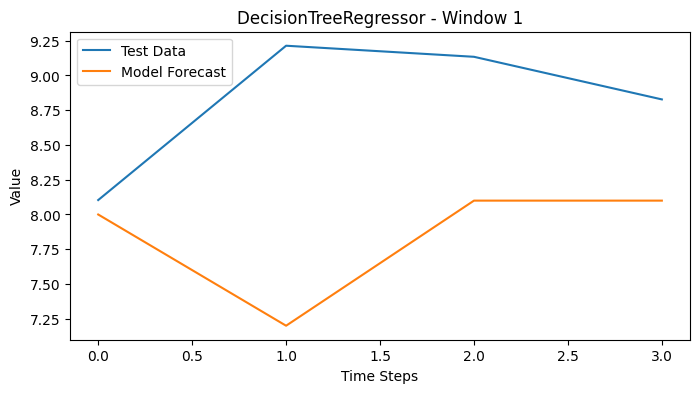

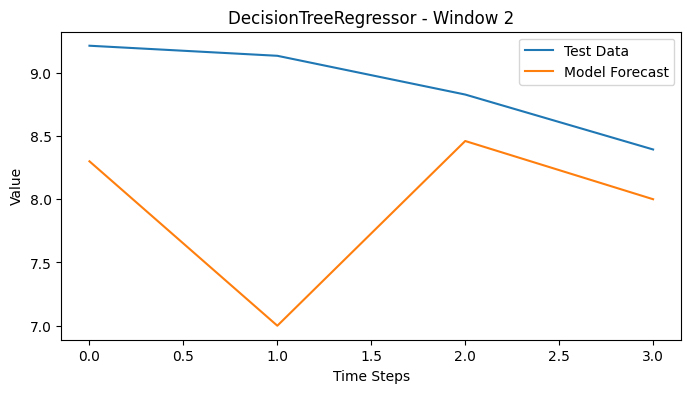

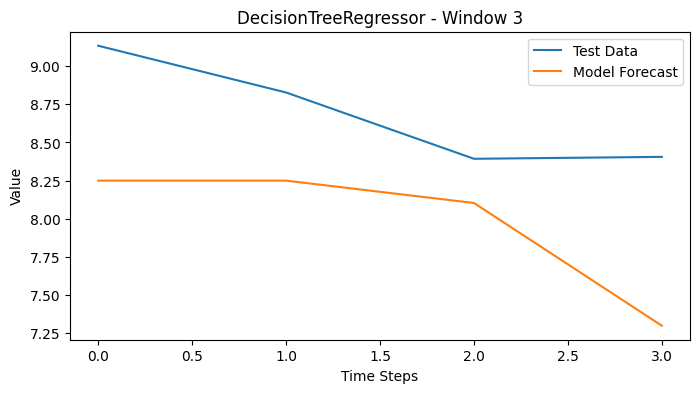

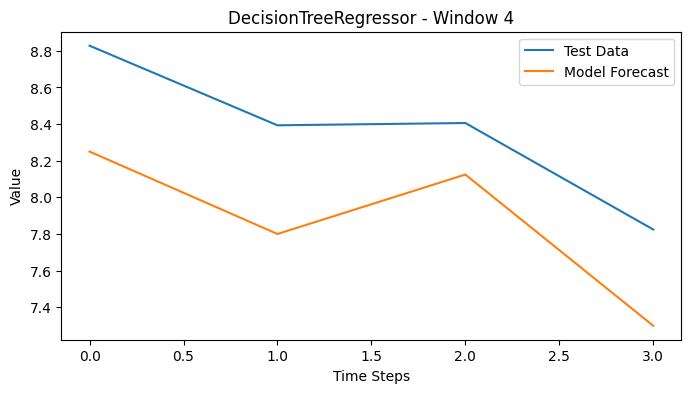

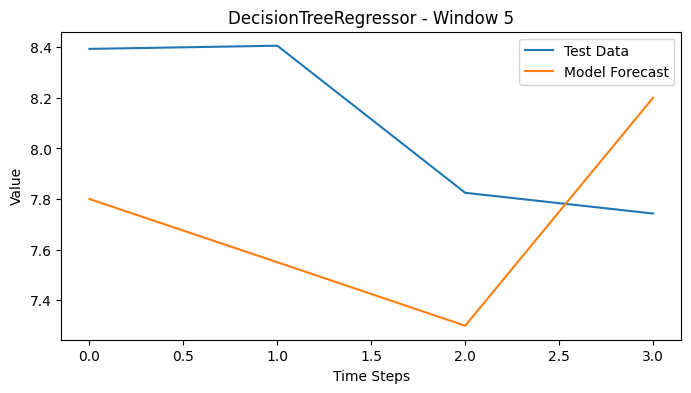

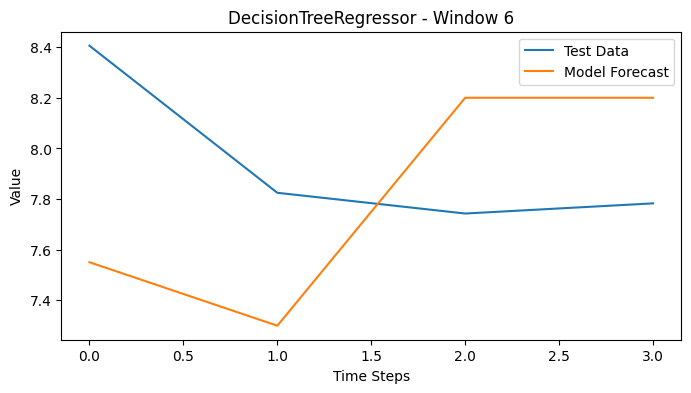

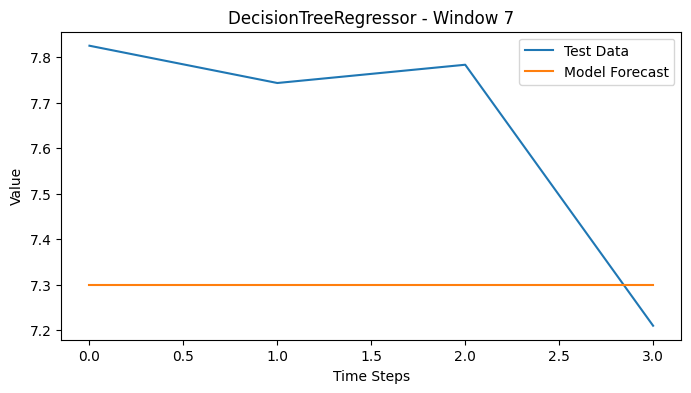

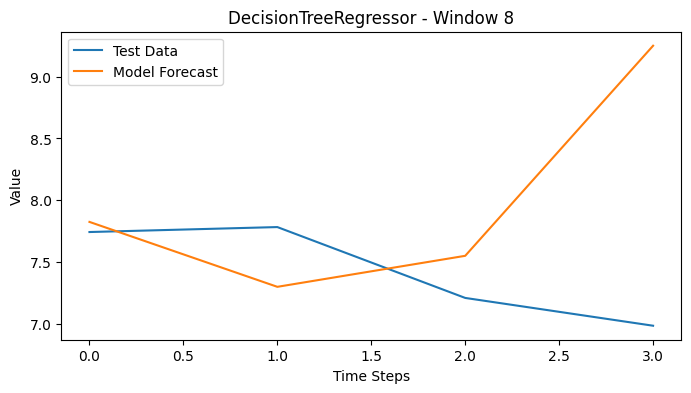

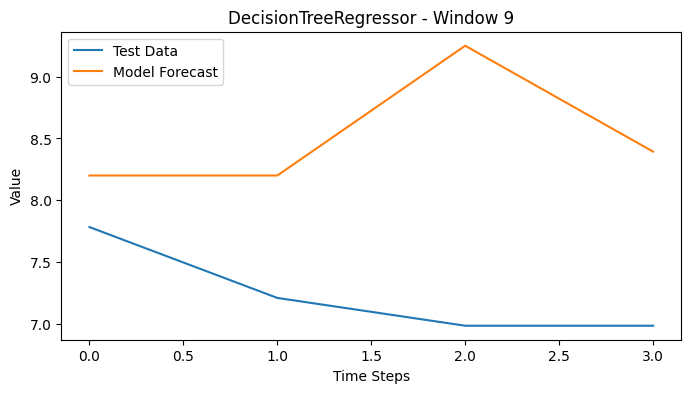

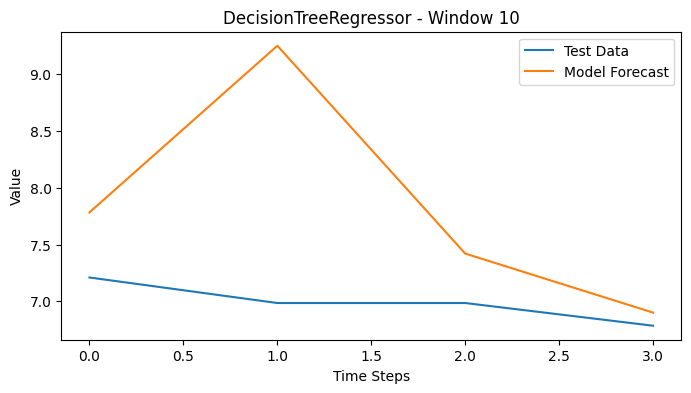

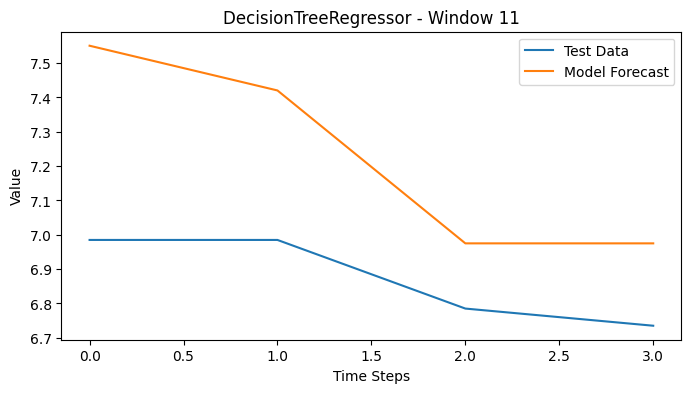

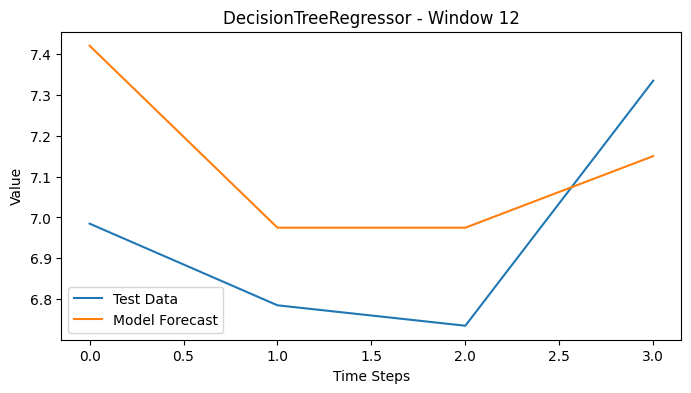

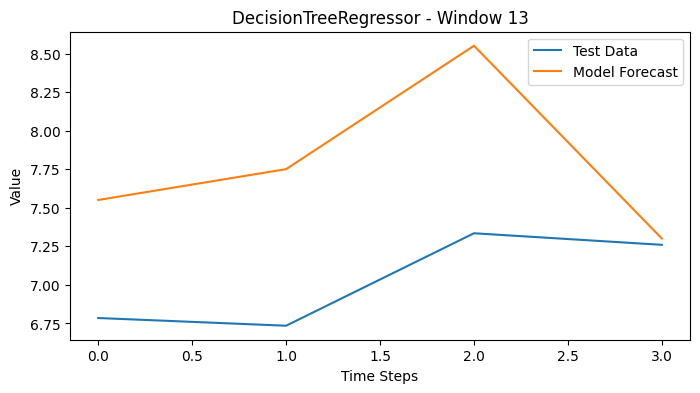

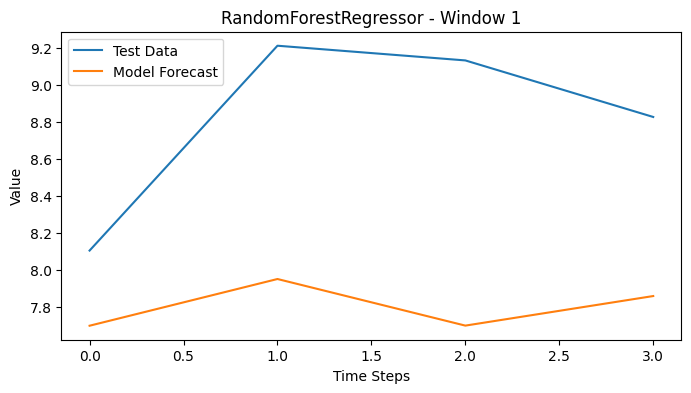

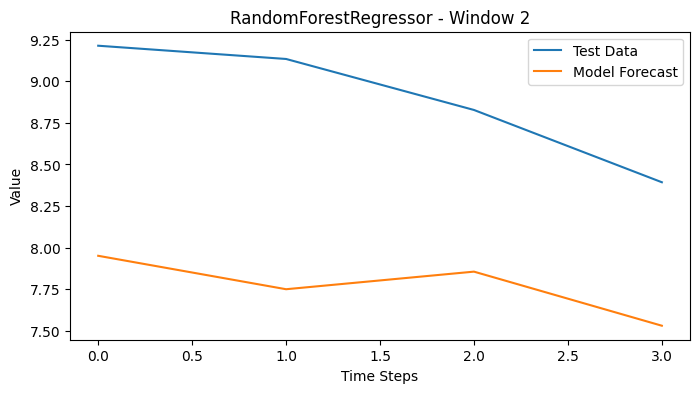

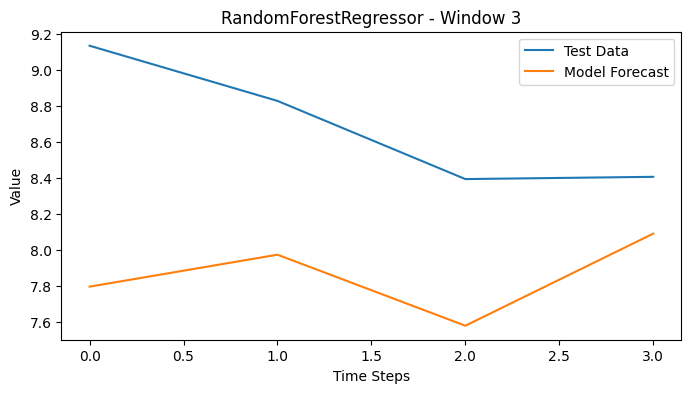

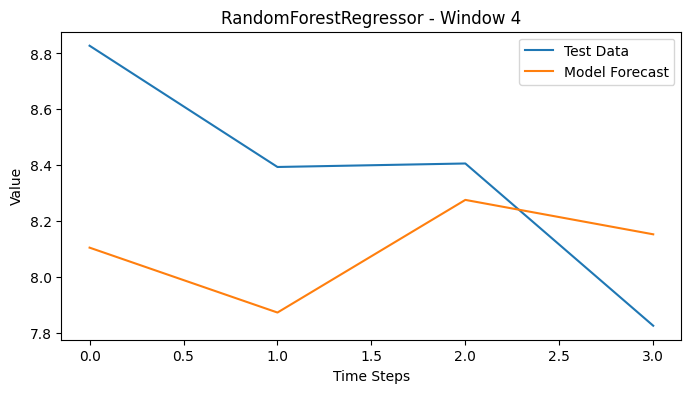

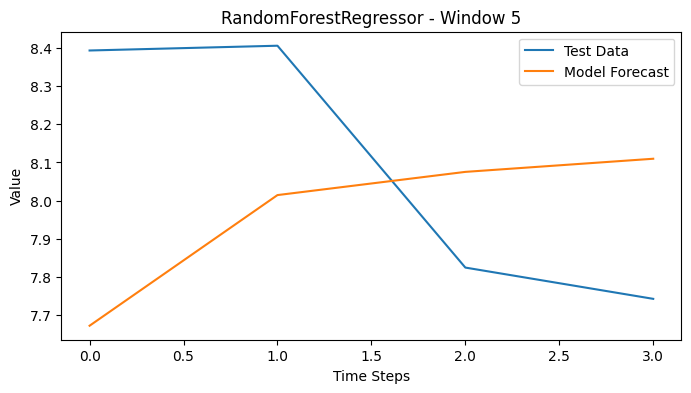

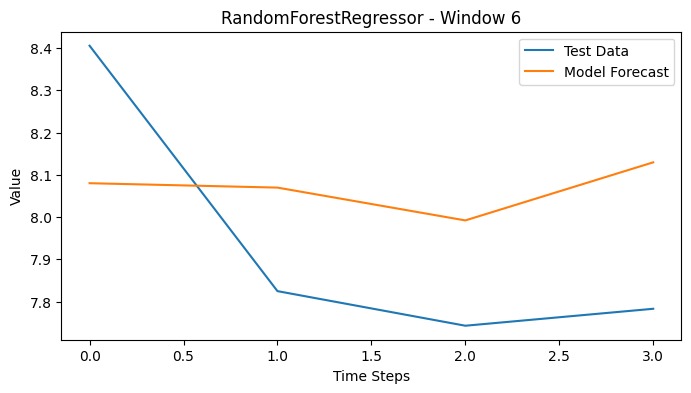

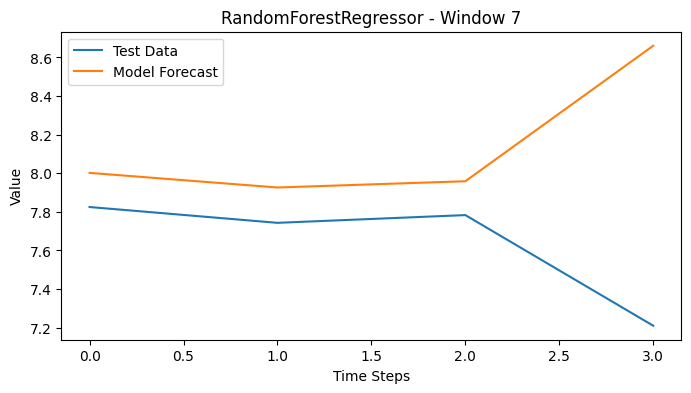

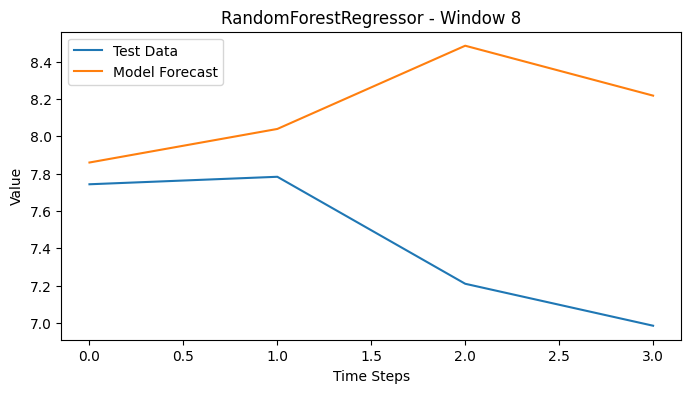

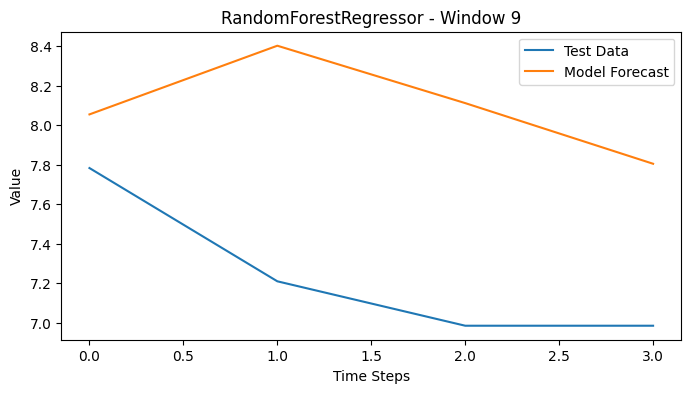

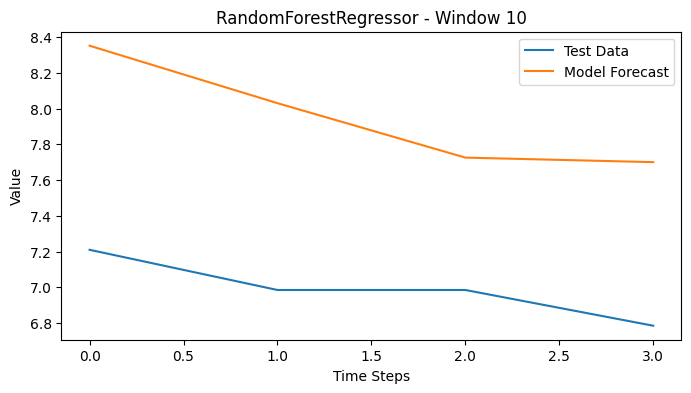

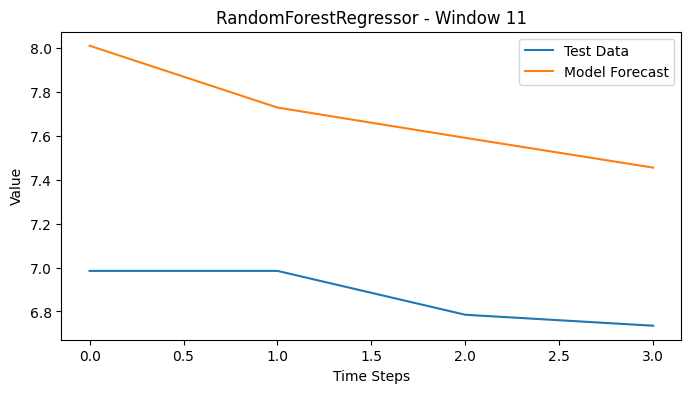

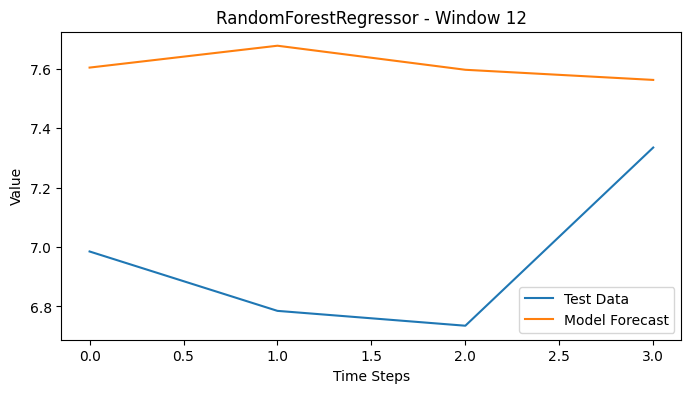

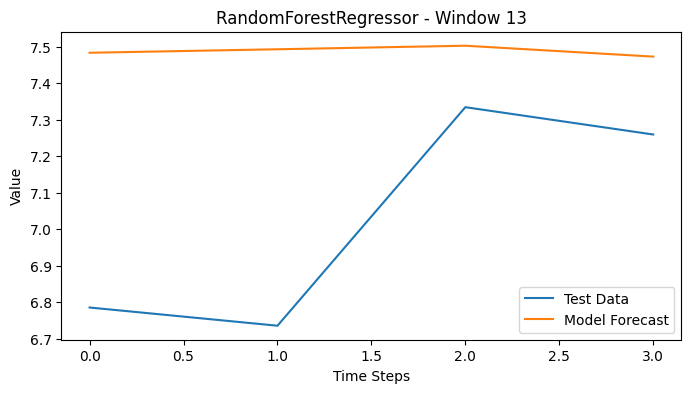

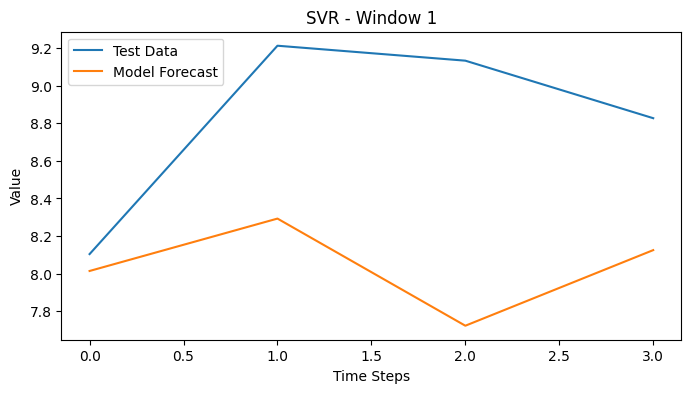

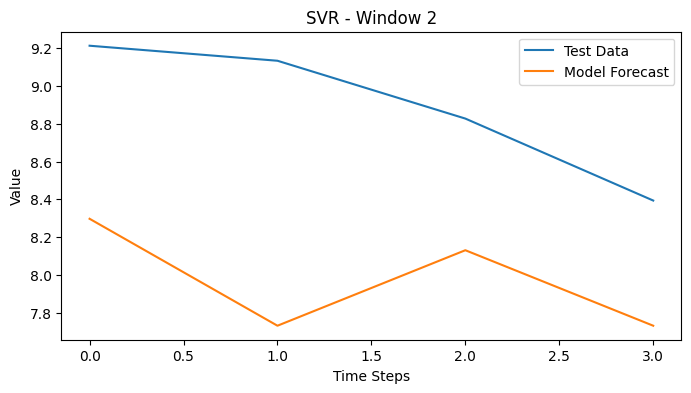

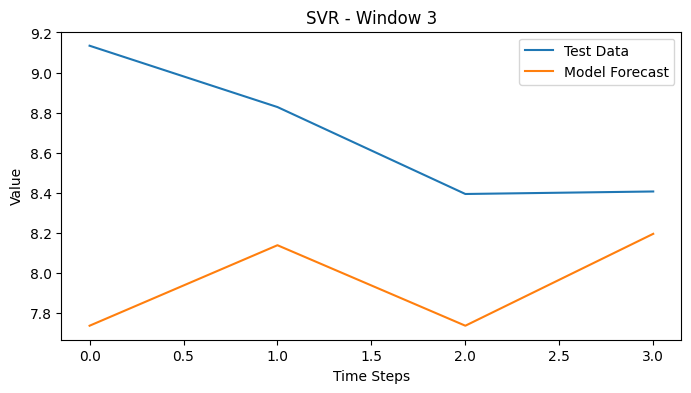

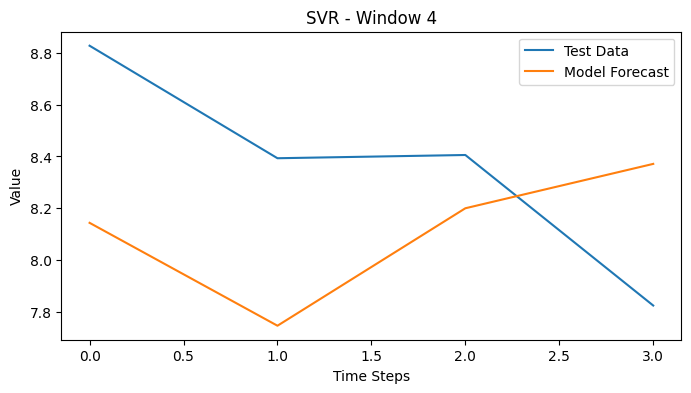

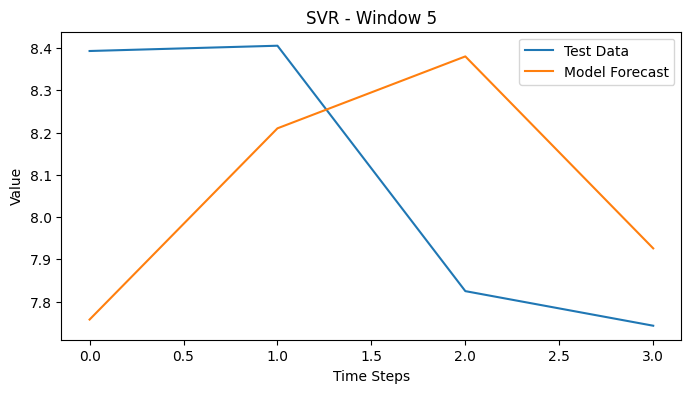

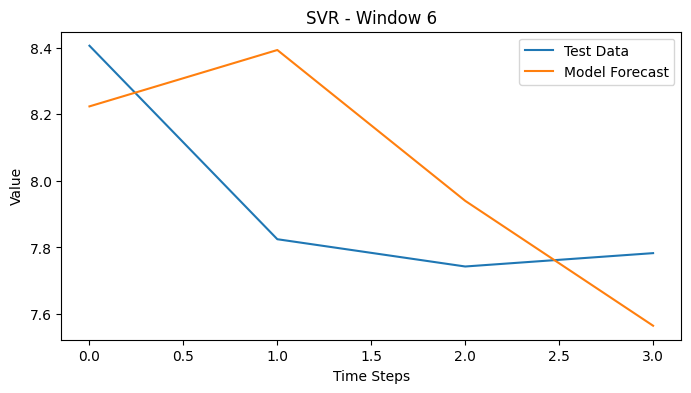

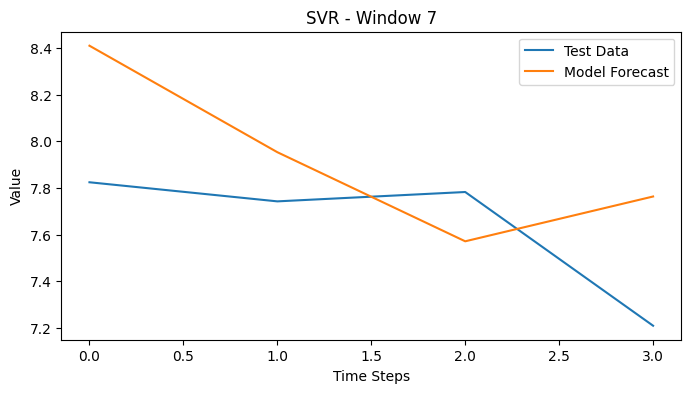

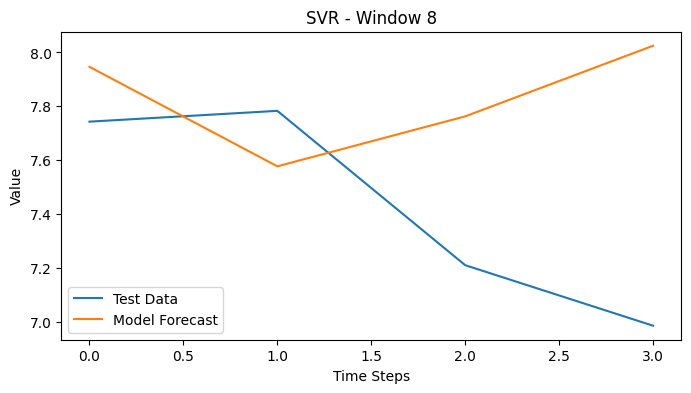

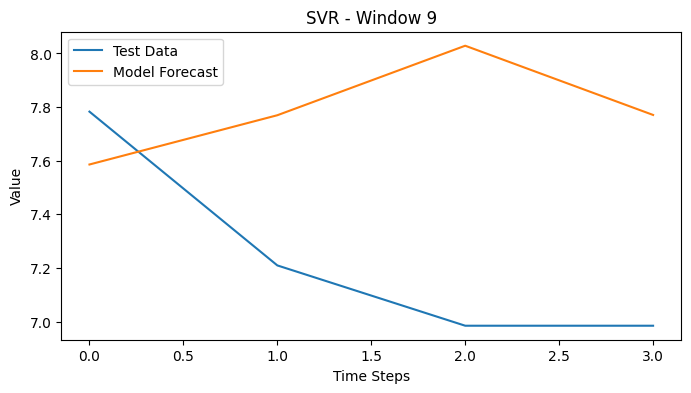

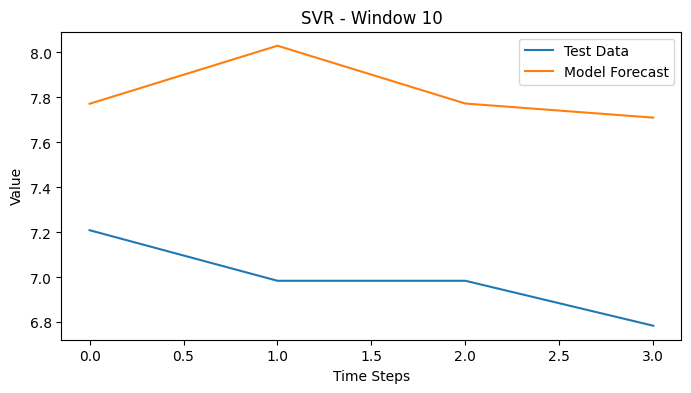

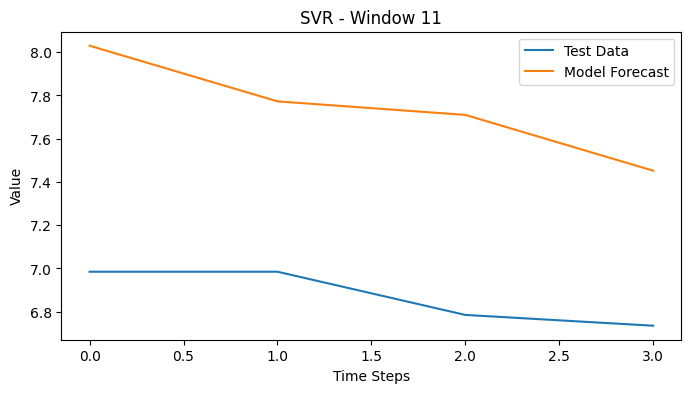

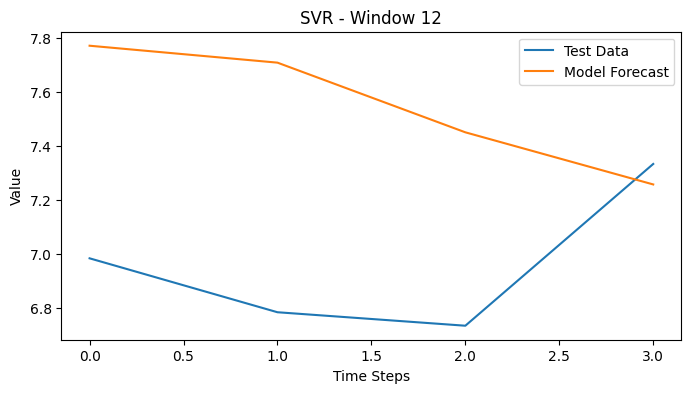

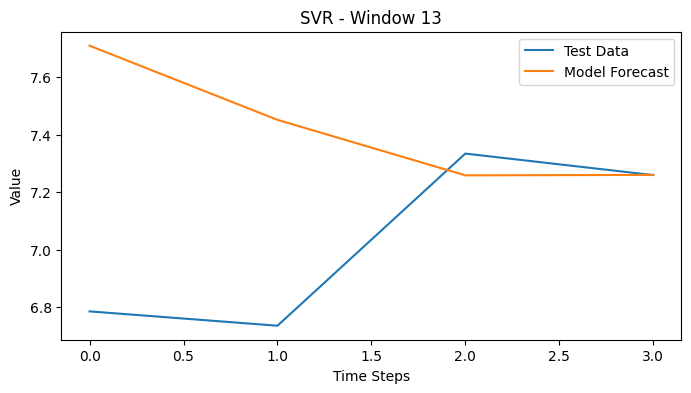

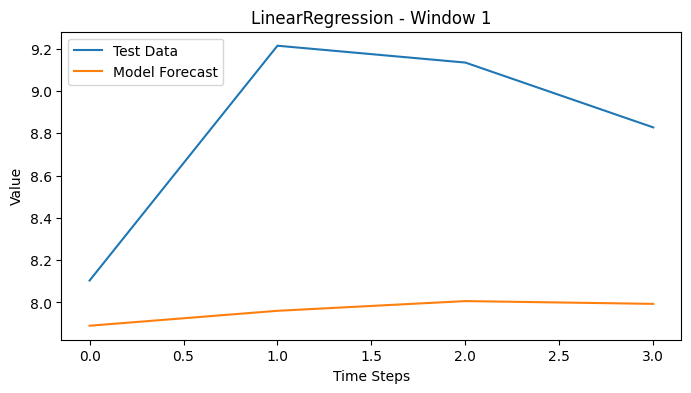

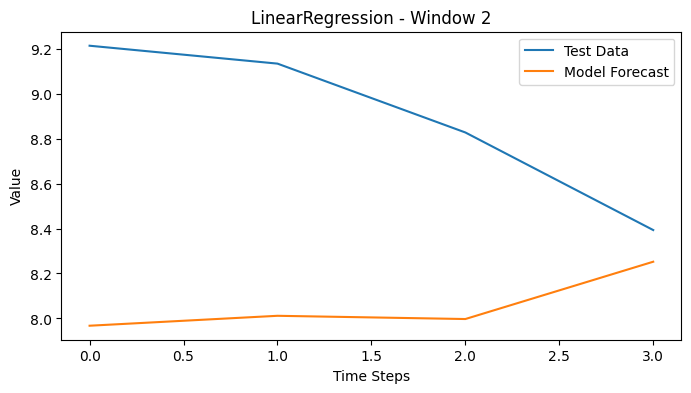

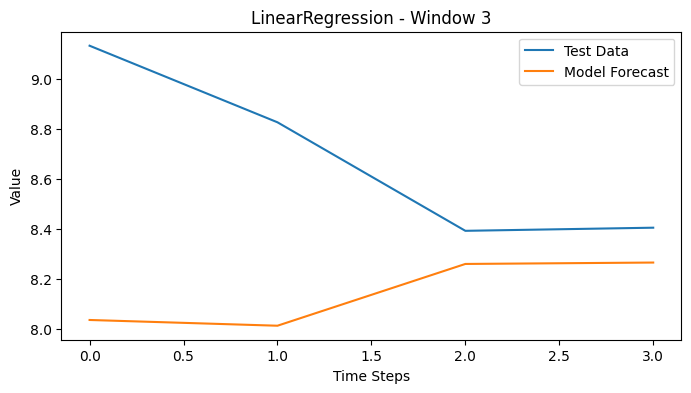

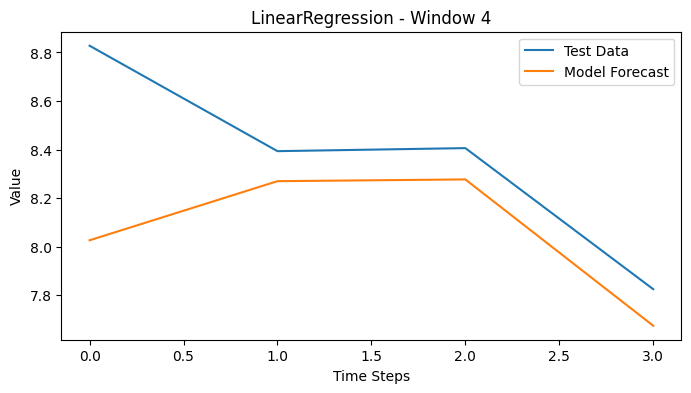

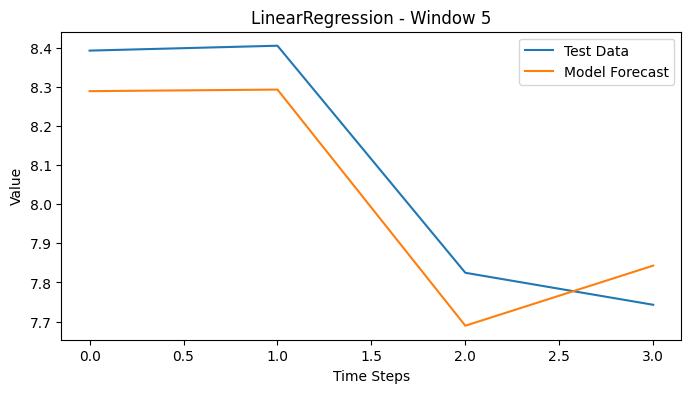

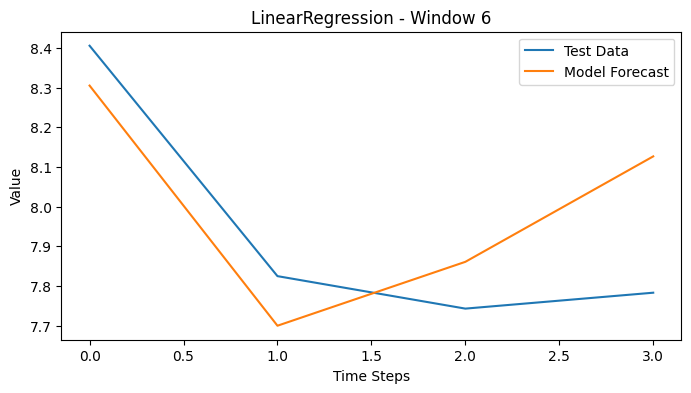

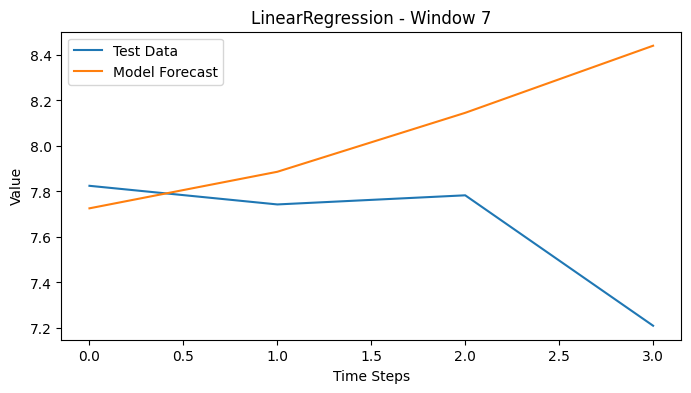

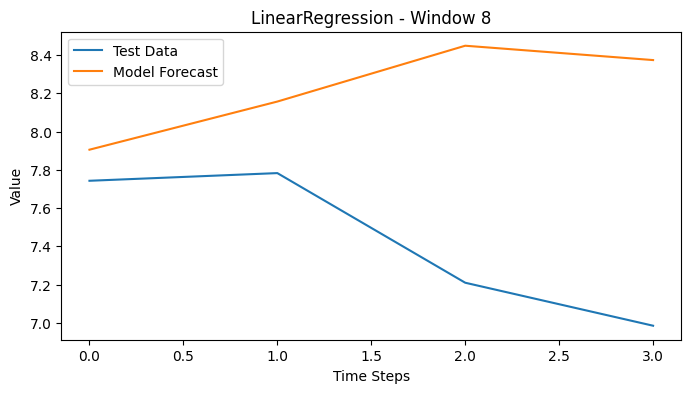

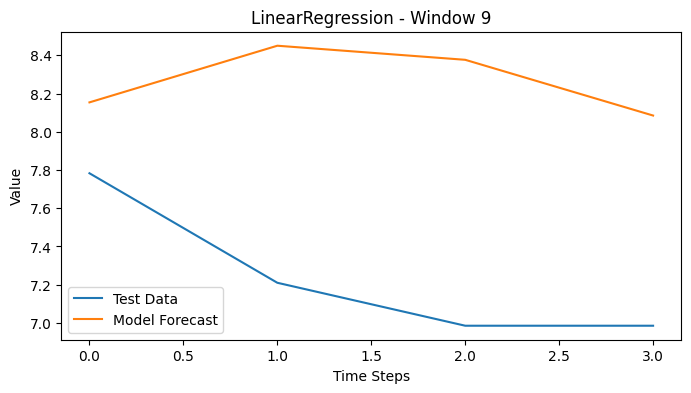

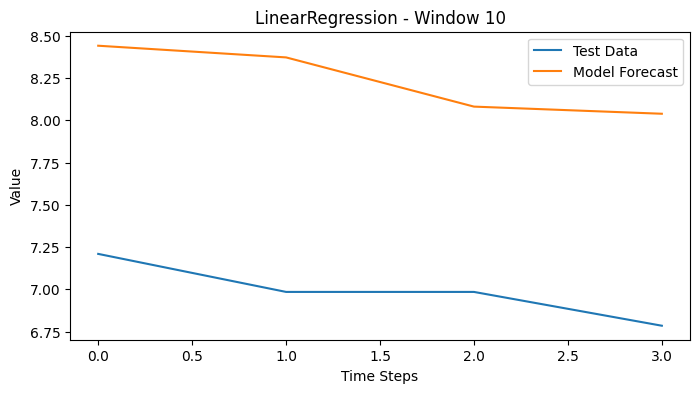

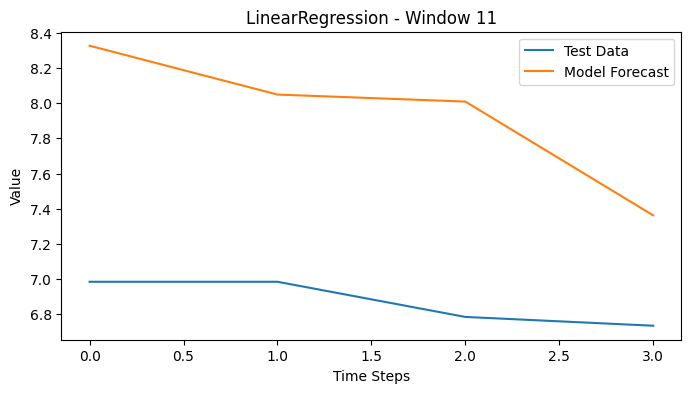

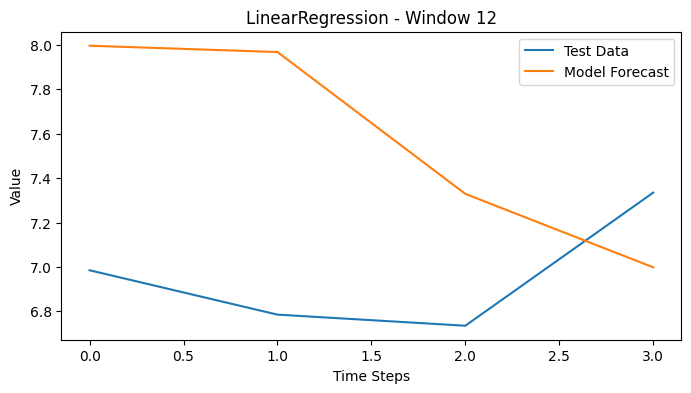

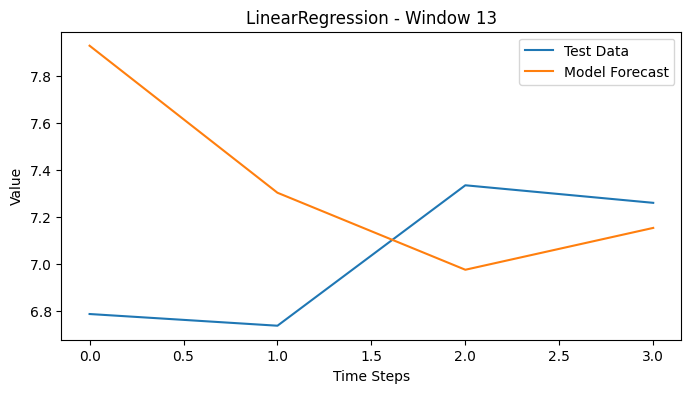

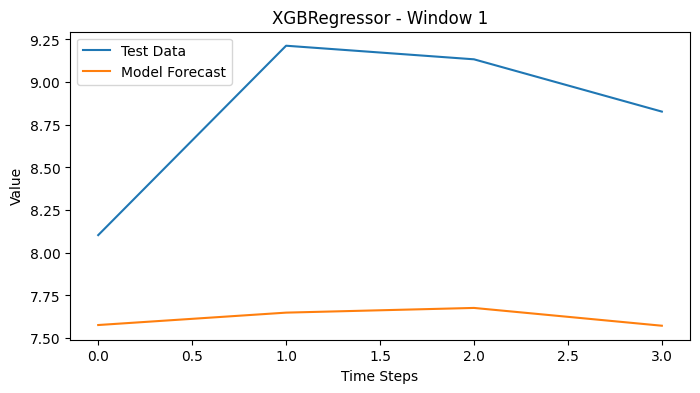

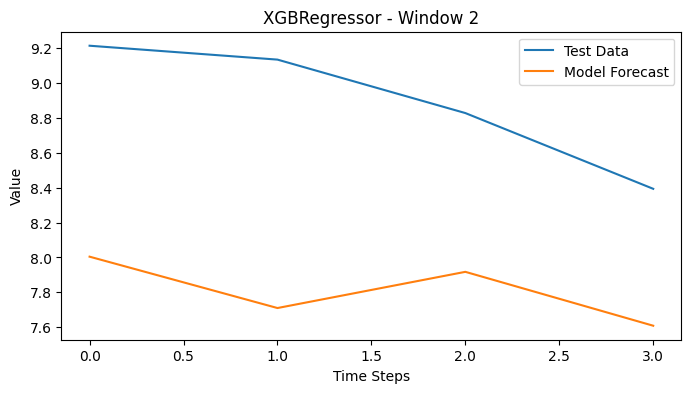

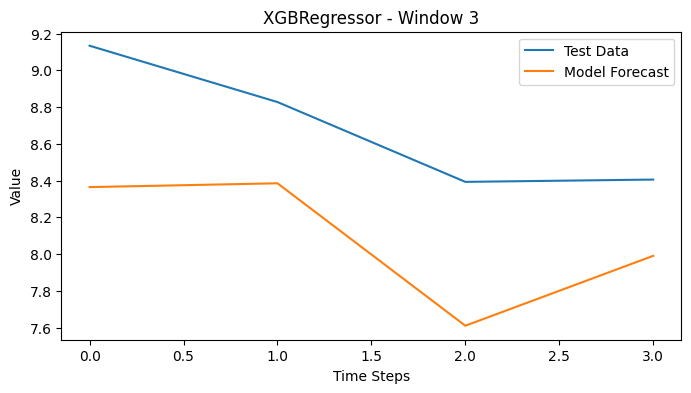

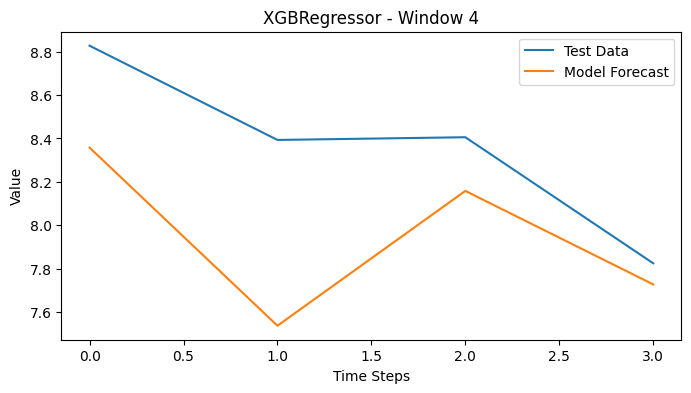

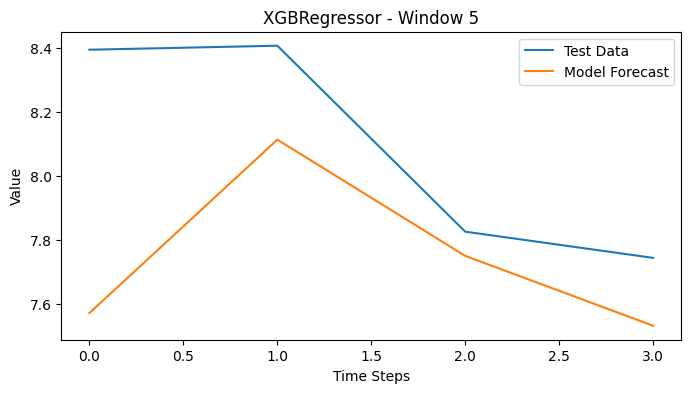

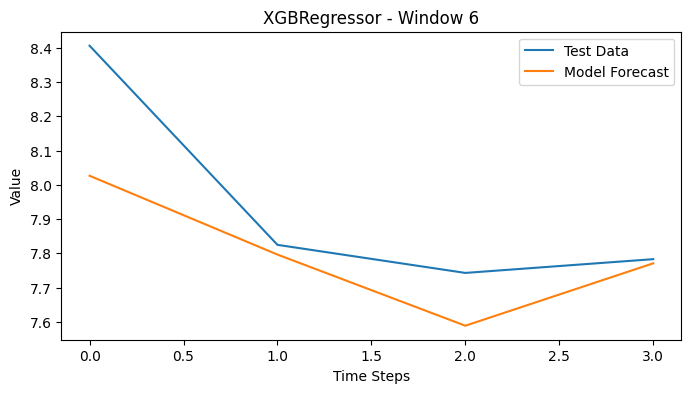

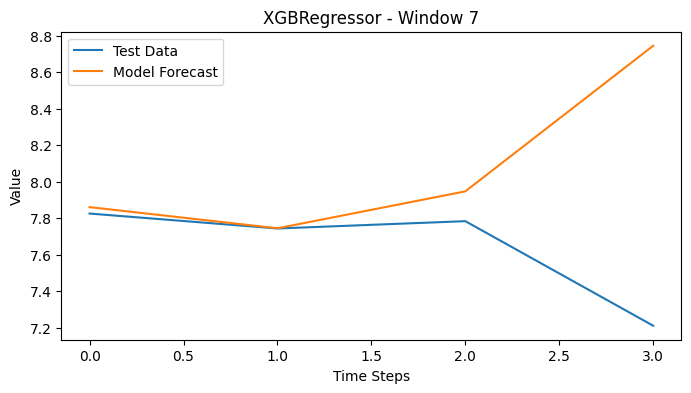

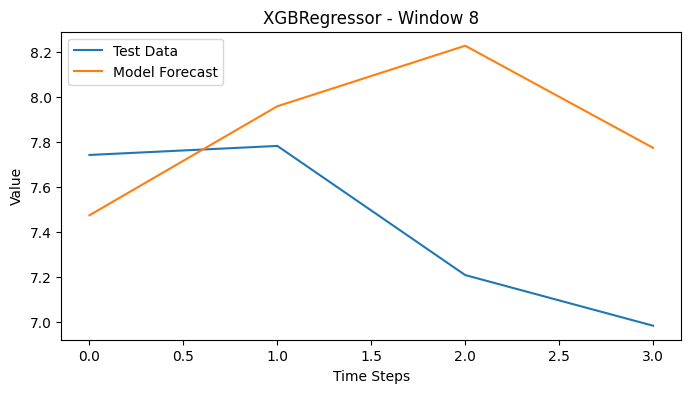

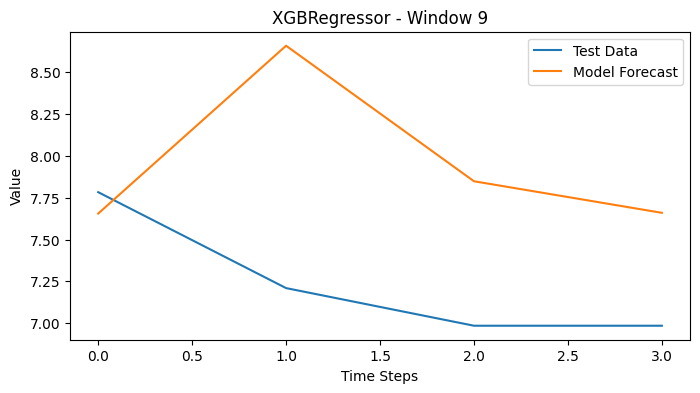

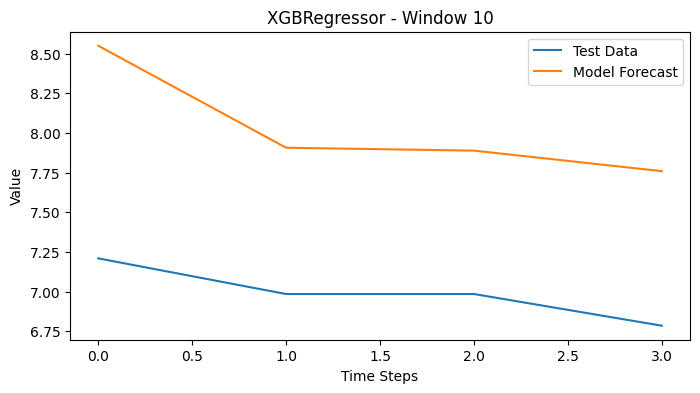

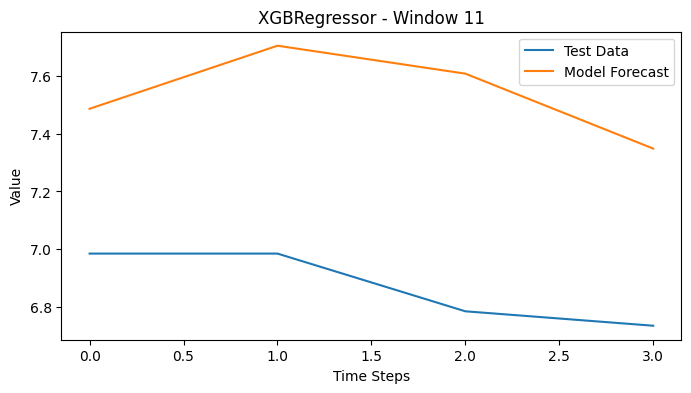

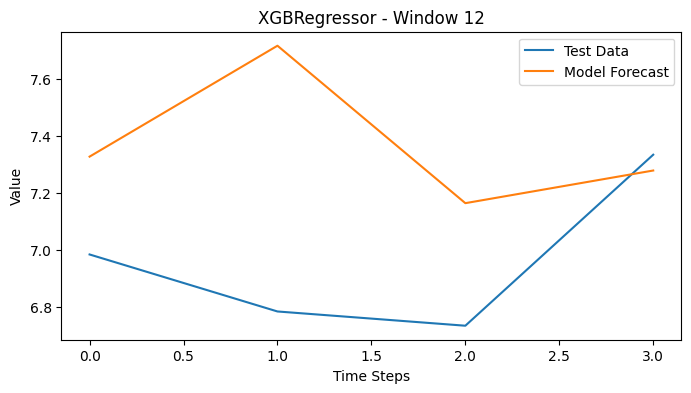

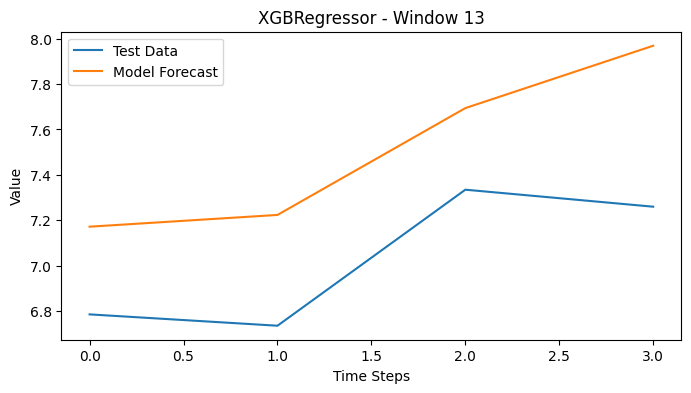

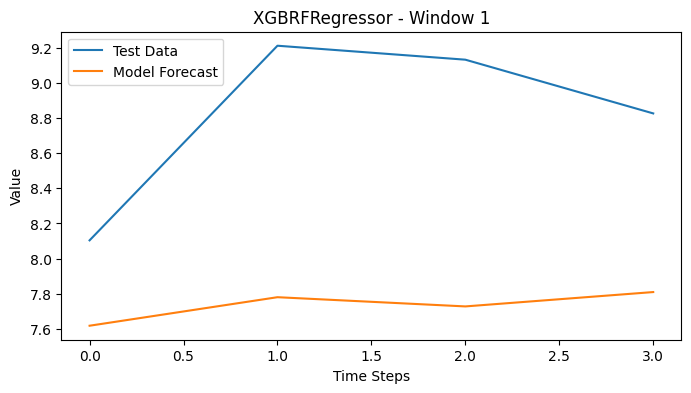

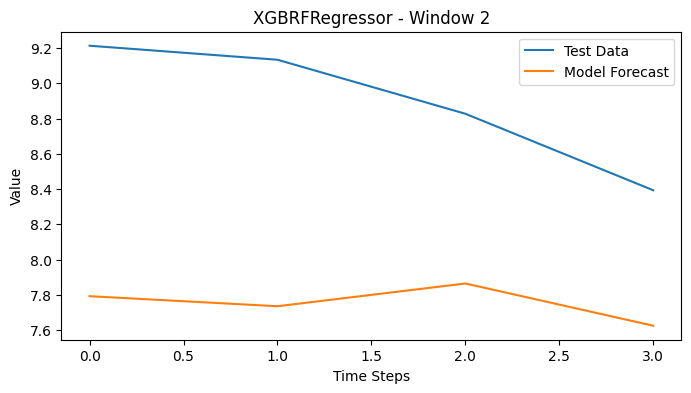

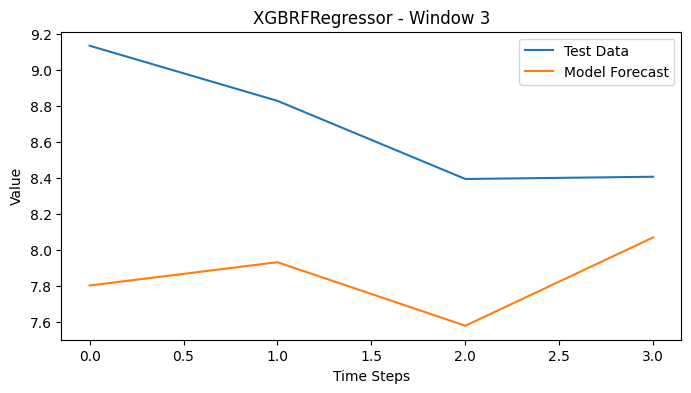

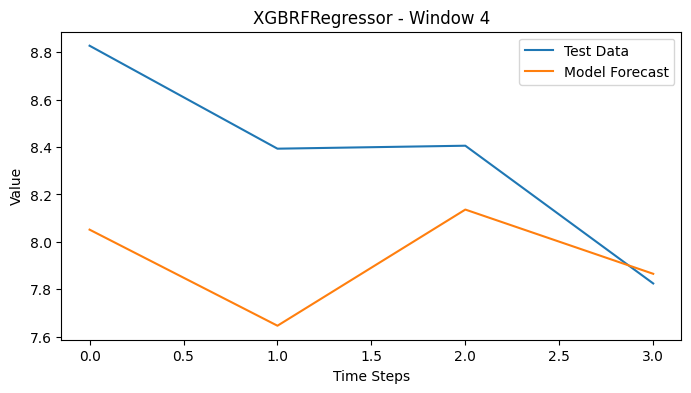

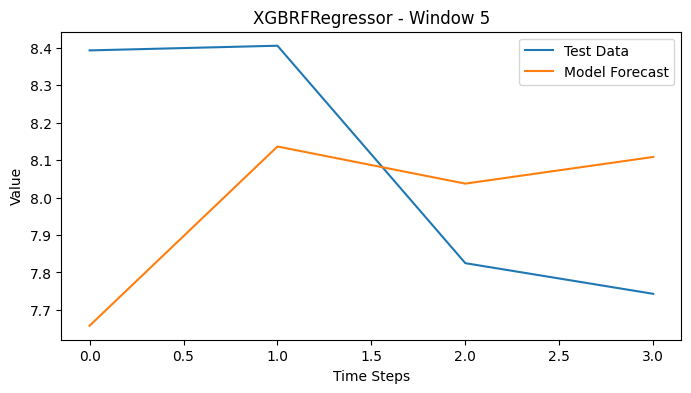

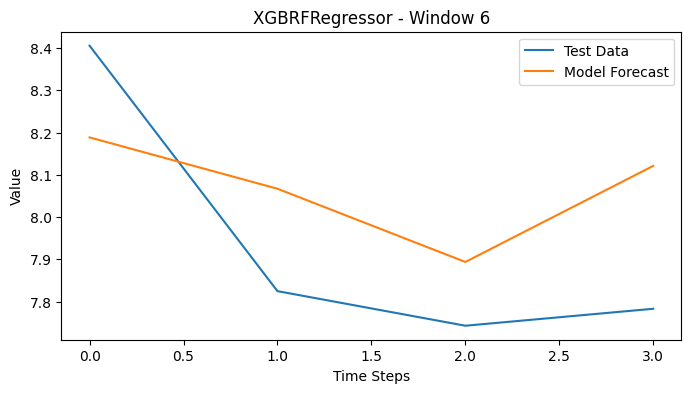

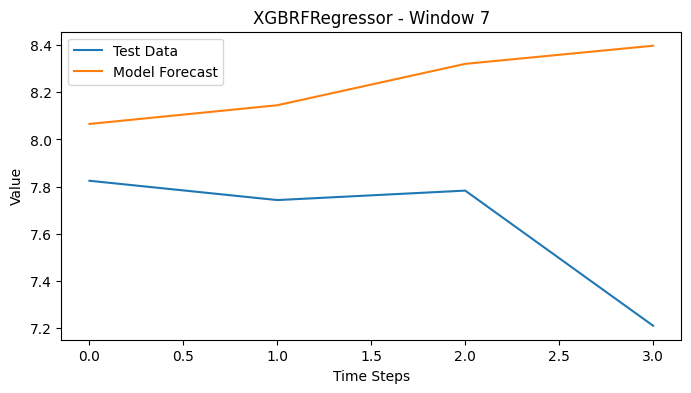

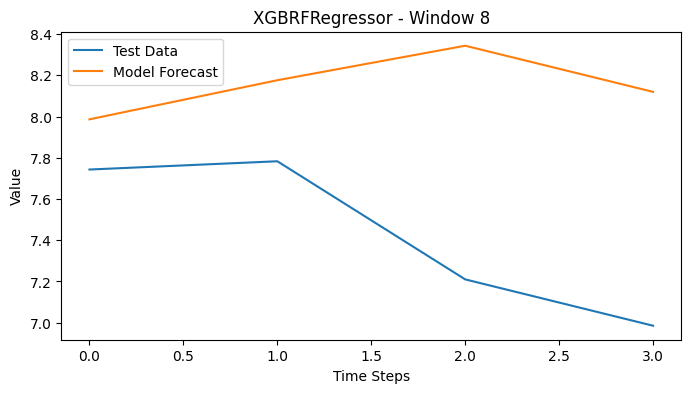

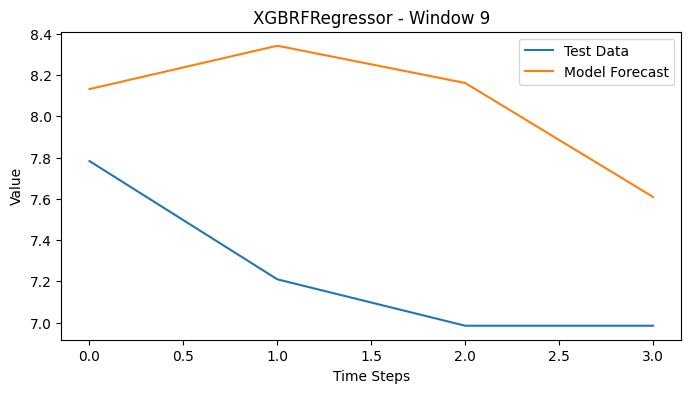

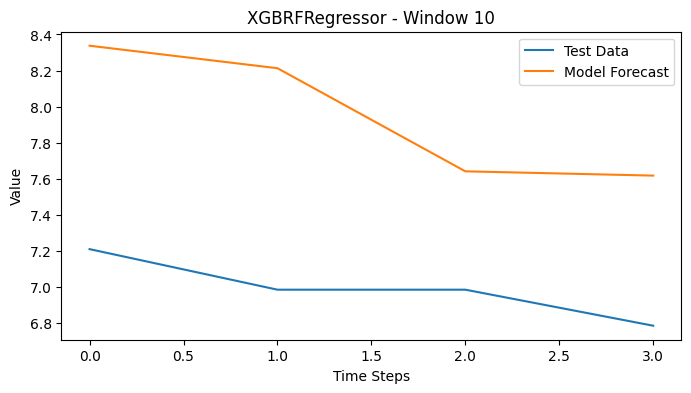

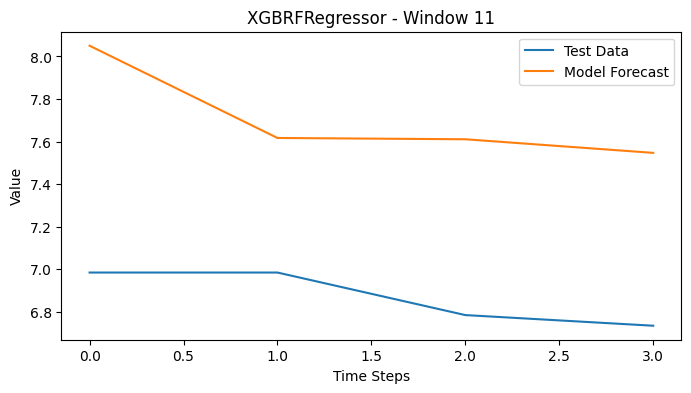

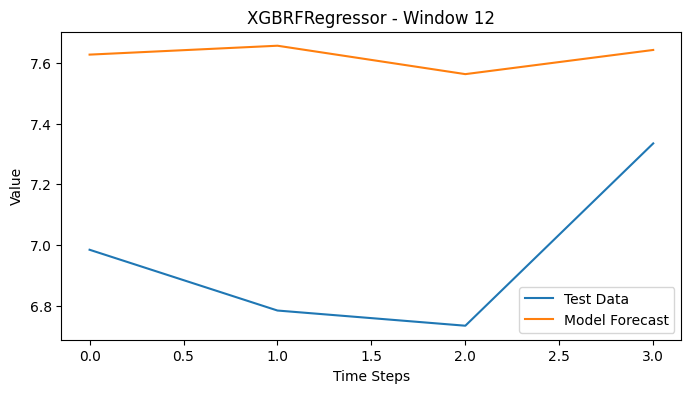

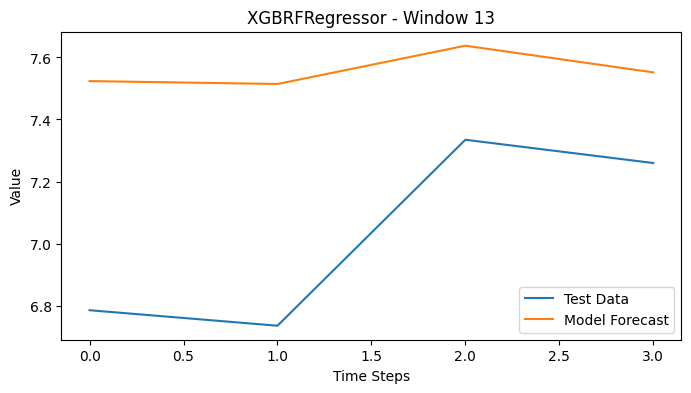

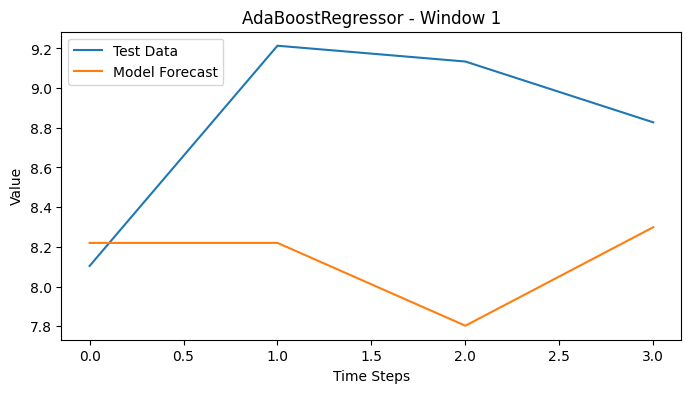

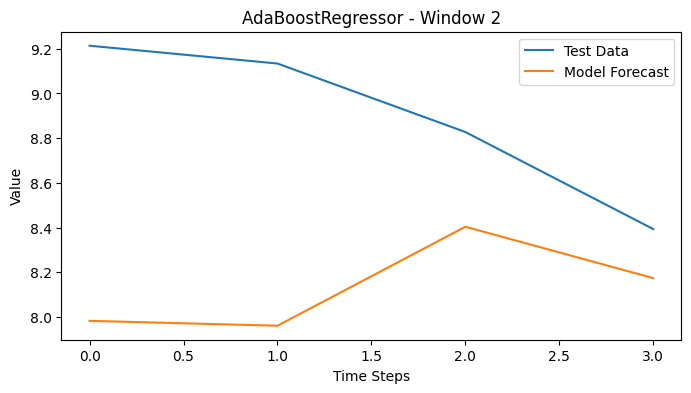

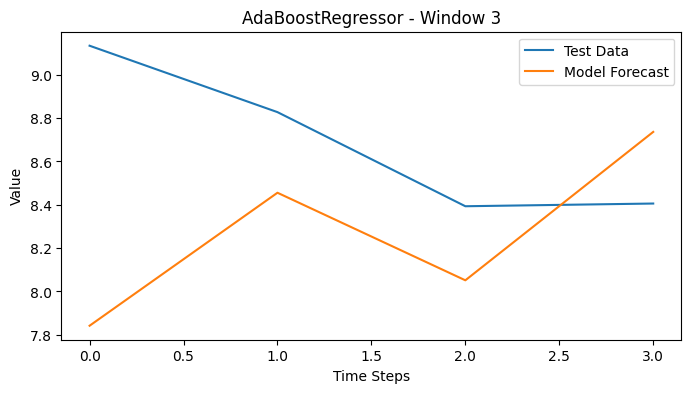

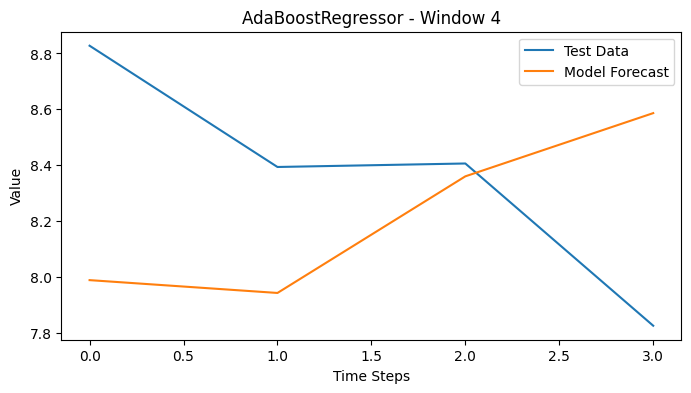

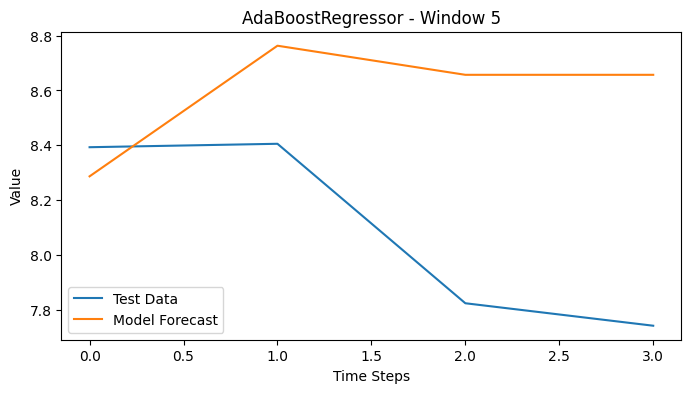

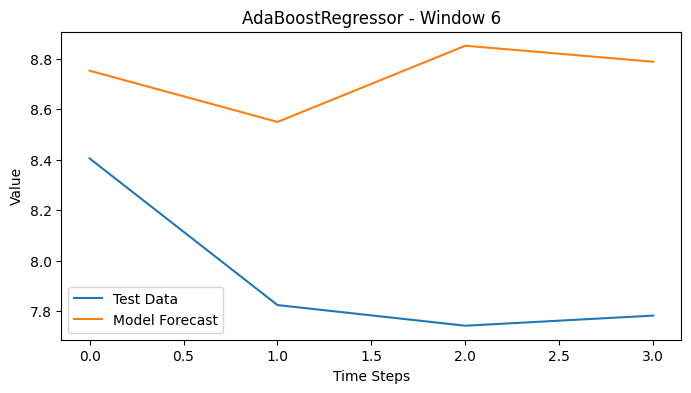

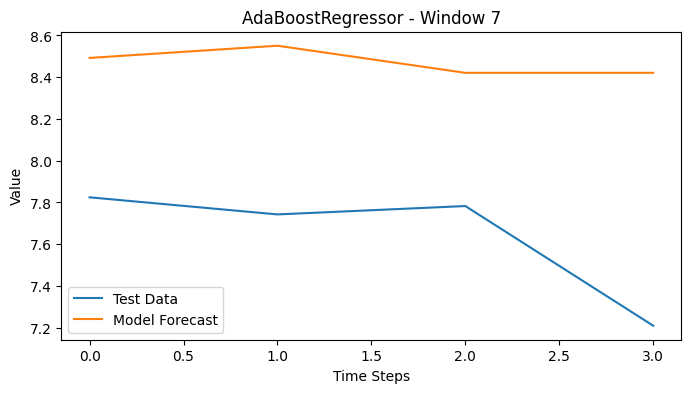

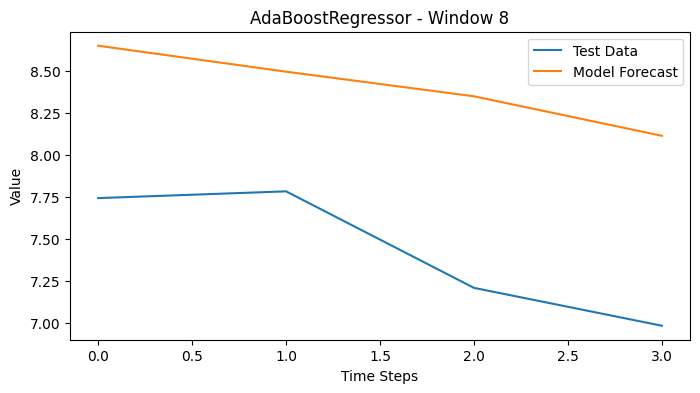

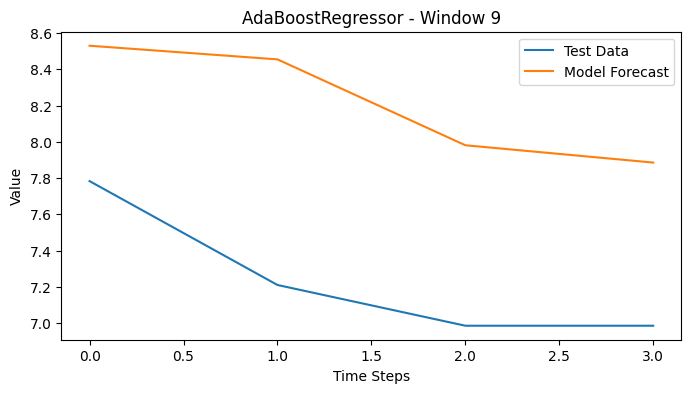

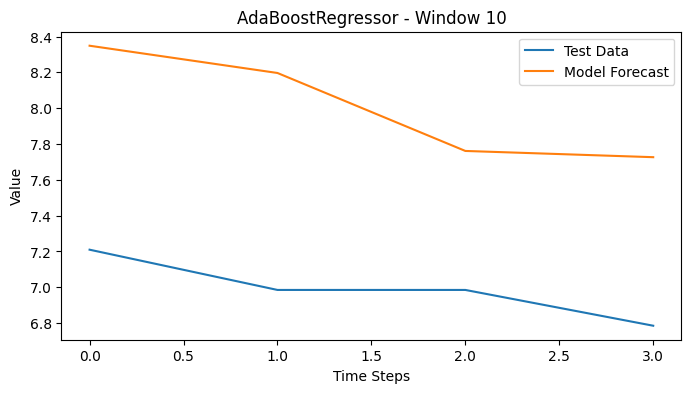

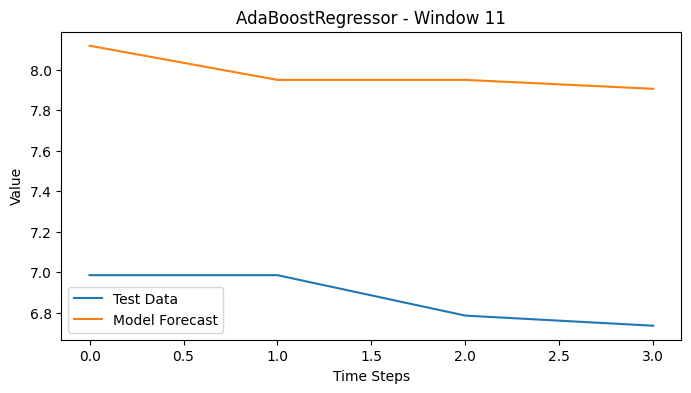

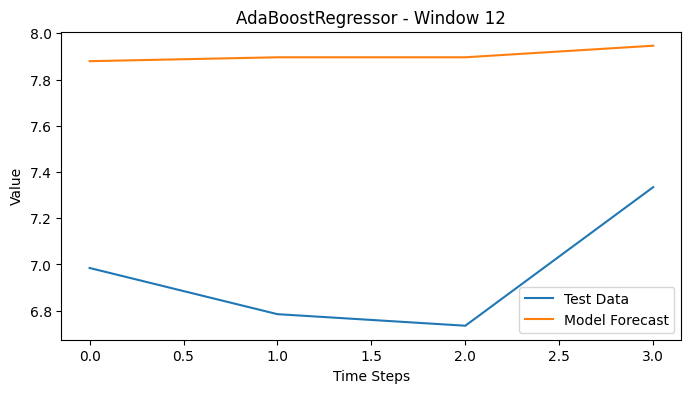

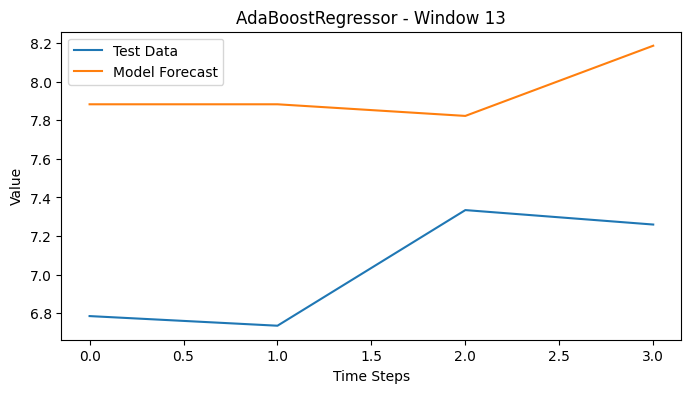

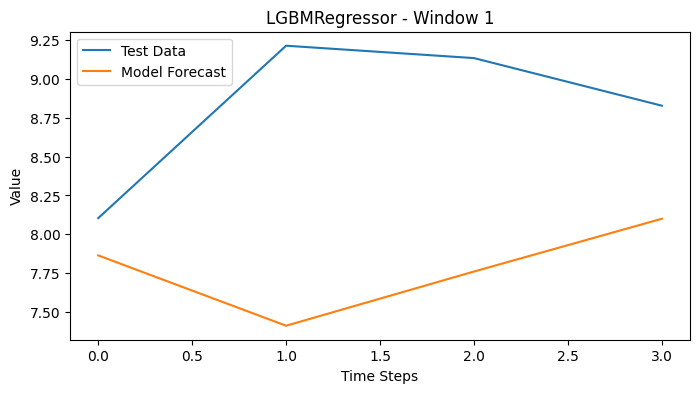

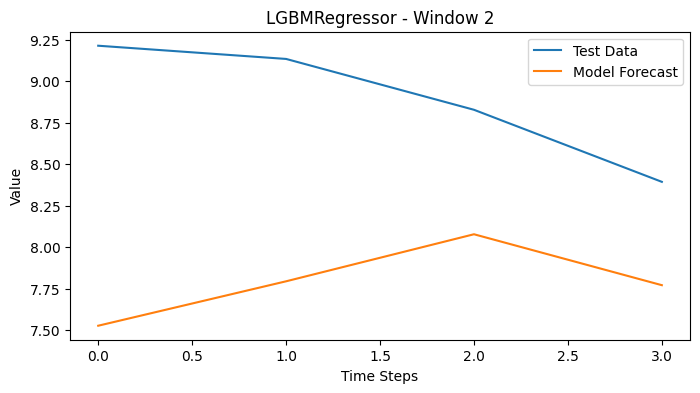

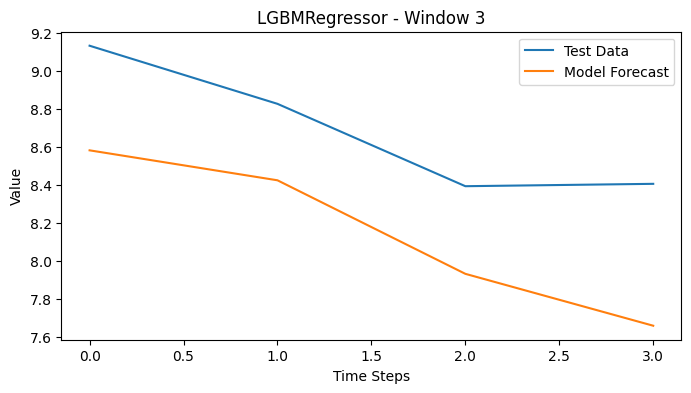

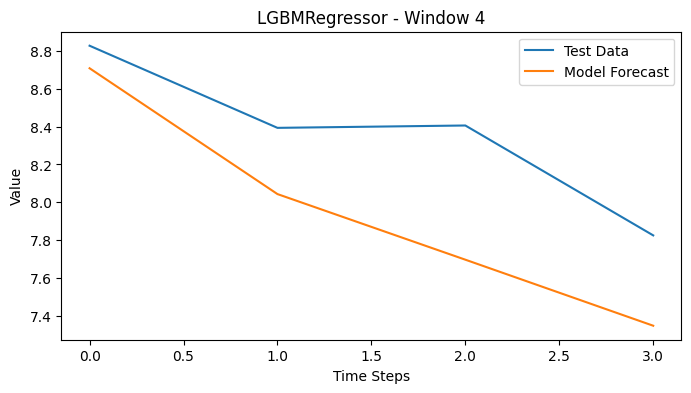

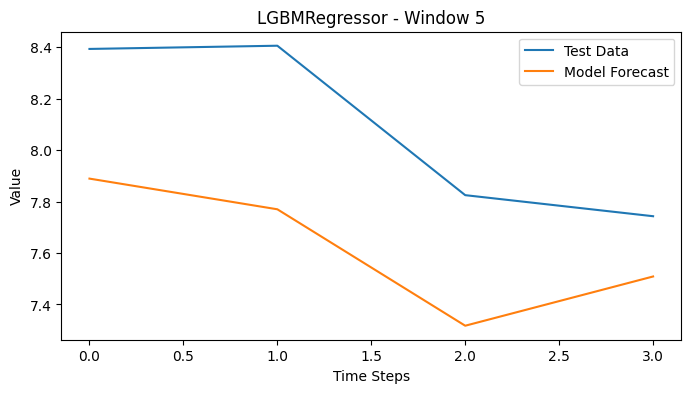

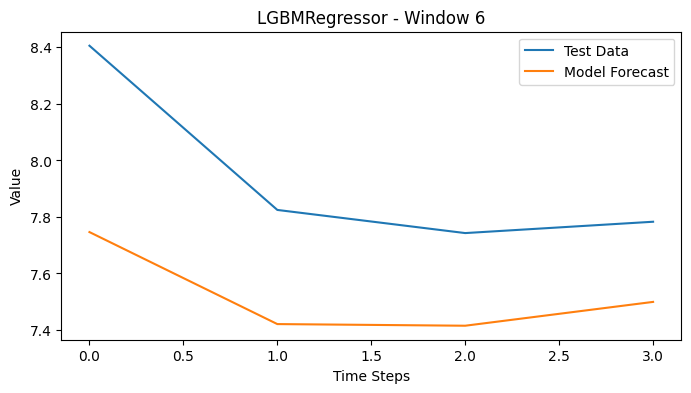

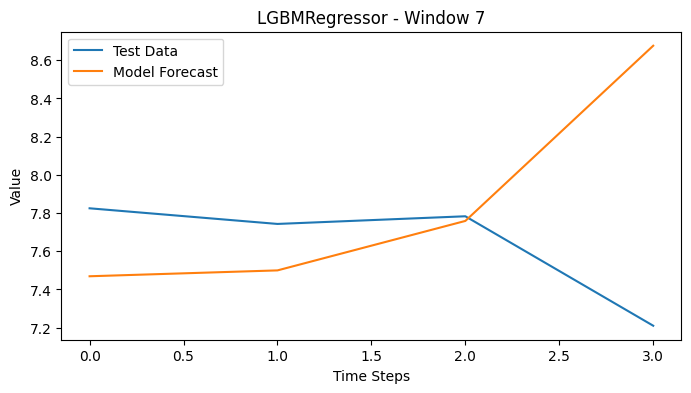

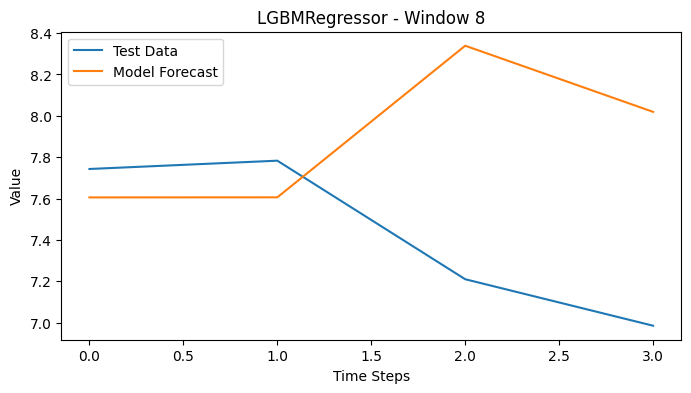

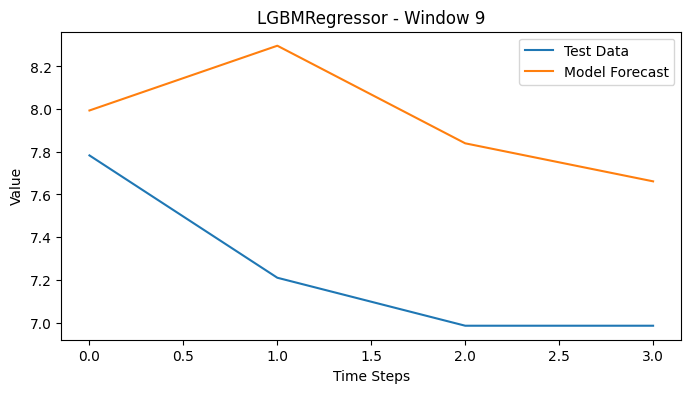

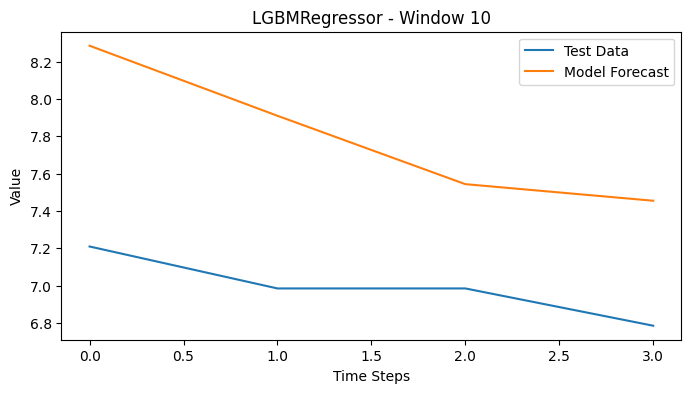

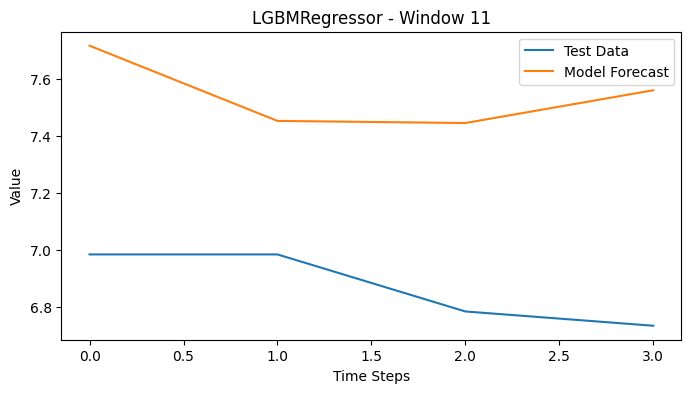

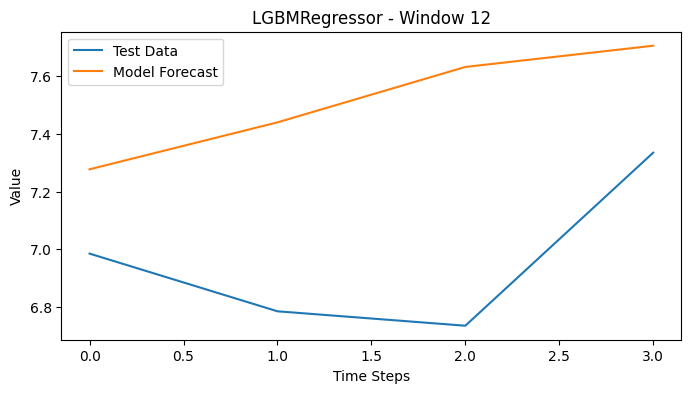

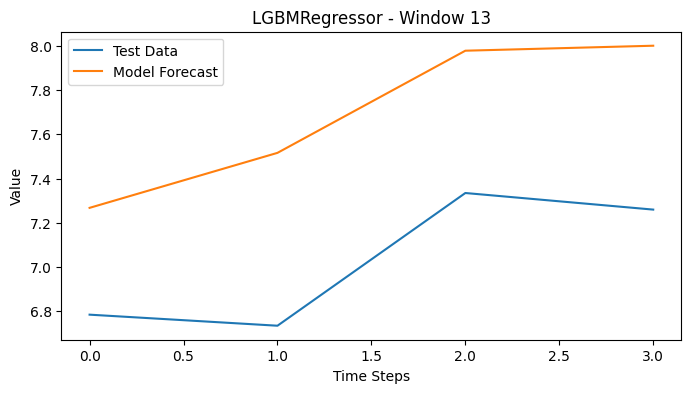

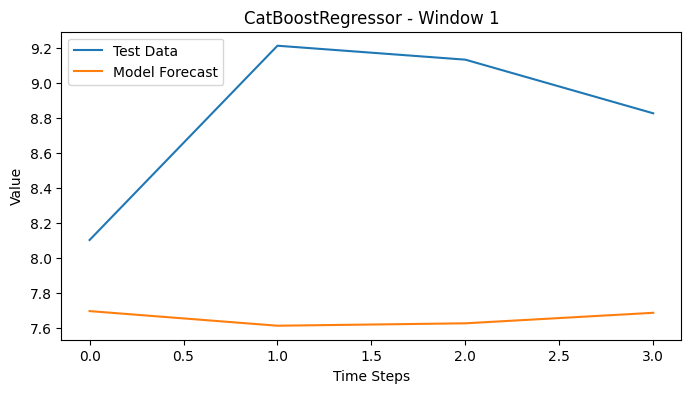

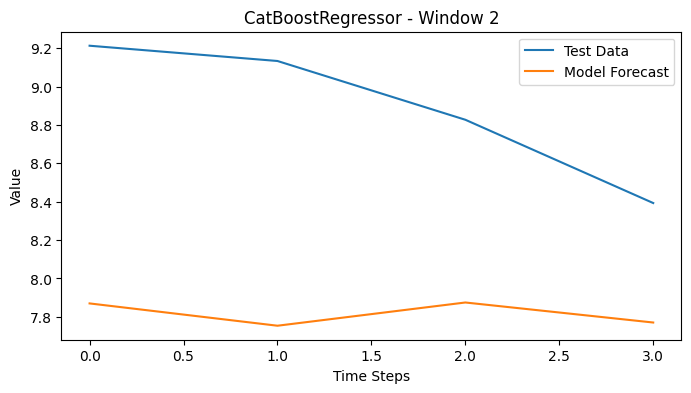

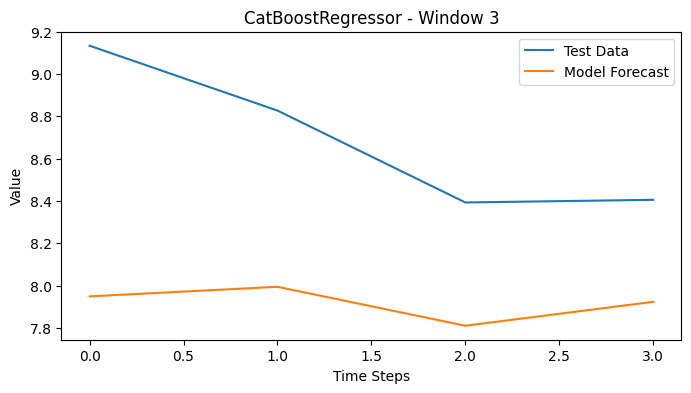

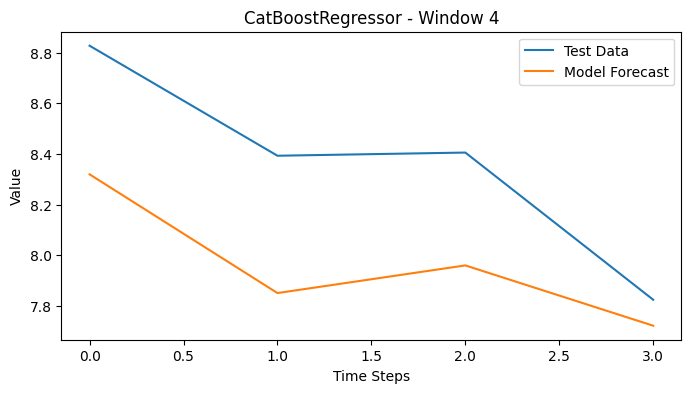

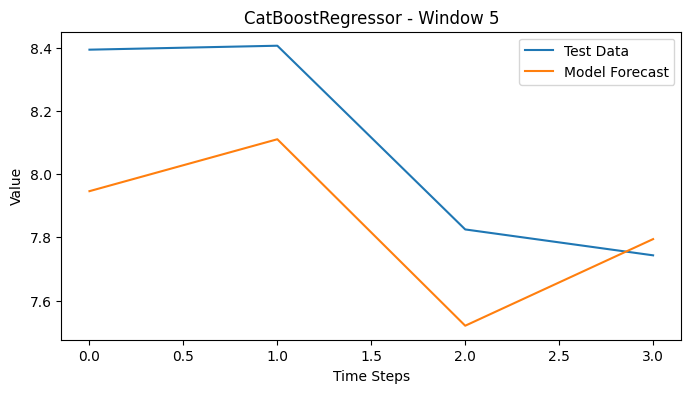

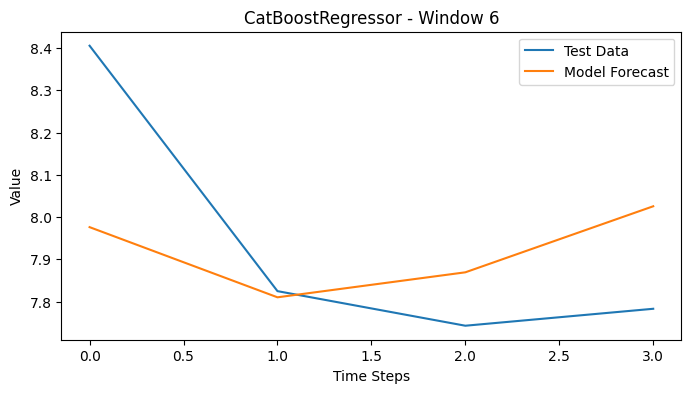

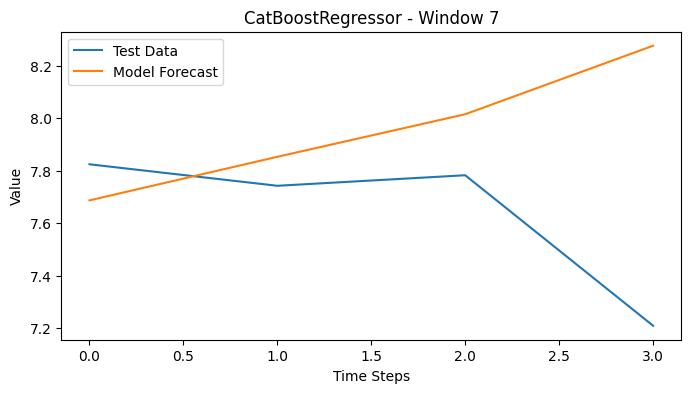

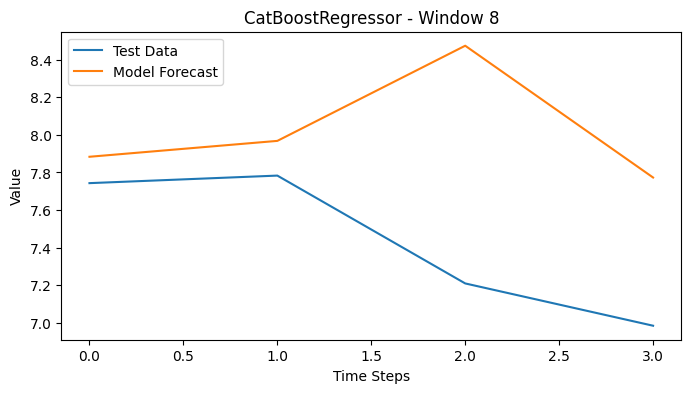

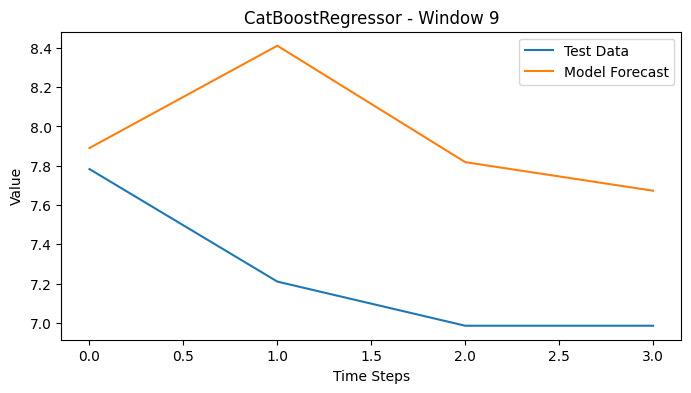

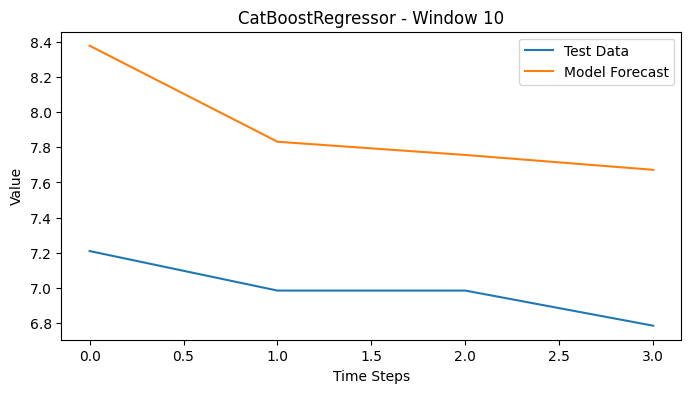

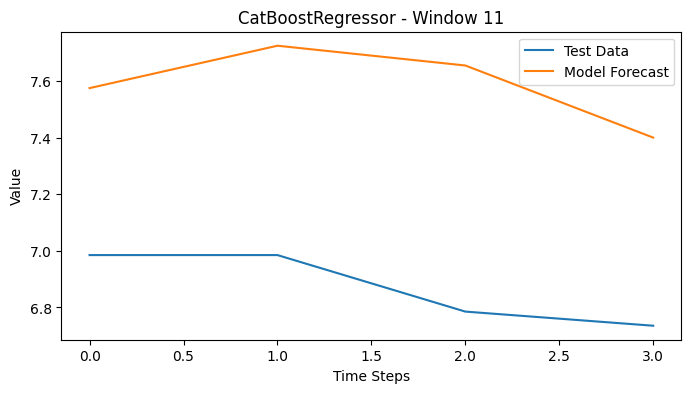

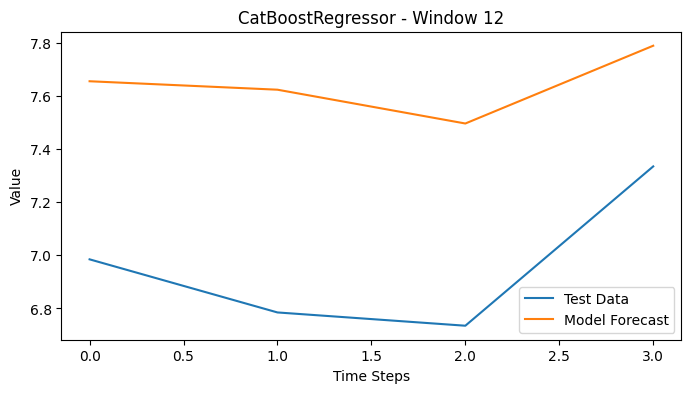

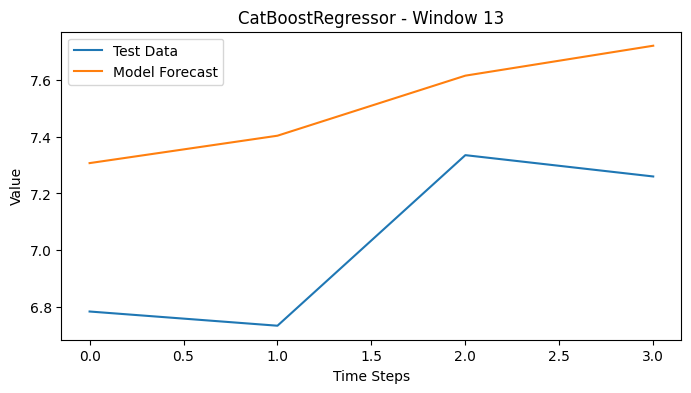

In [16]:
mae_results = {}
model_data = {}

for i in range(n_train, len(df_red) - forecast_horizon + 1 ):
    # Split the data into the training set and test set for each window
    train_data = df_red_12feat[i - n_train:i]
    test_data = df_red_12feat[i:i + forecast_horizon]

    X_train= train_data.drop('price', axis= 1)
    y_train= train_data['price']

    X_test= test_data.drop('price', axis= 1)
    y_test= test_data['price']

    for model in models:
      model.fit(X_train, y_train)
      y_pred_red = model.predict(X_test)
      #y_pred_red_results[f'y_pred_red_results{i}']=y_pred_red

      mae = mean_absolute_error(y_test, y_pred_red)
      model_name = model.__class__.__name__  # Get the model's name as the key
      if model_name not in mae_results:
        mae_results[model_name] = []
        model_data[model_name] = {'y_test': [], 'y_pred_red': []}
      mae_results[model_name].append(mae)
      # Store test and prediction data
      model_data[model_name]['y_test'].append(y_test.values)
      model_data[model_name]['y_pred_red'].append(y_pred_red)

# Display the MAE results for each model
for model_name, mae_list in mae_results.items():
    print(f'Model: {model_name}')
    for i, mae in enumerate(mae_list):
        print(f'Window {i+1}: MAE = {mae:.4f}')


# Create plots for each model
for model_name in mae_results.keys():
    for i, (test_values, forecast_values) in enumerate(
        zip(model_data[model_name]['y_test'], model_data[model_name]['y_pred_red'])
    ):
        plt.figure(figsize=(8, 4))
        plt.plot(test_values, label='Test Data')
        plt.plot(forecast_values, label='Model Forecast')
        plt.title(f"{model_name} - Window {i+1}")
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.show()





In [17]:
mae_results_models= pd.DataFrame(mae_results)

In [18]:
mae_scores= mae_results_models.T

In [19]:
mae_scores['mean']= mae_scores.mean(axis=1)

In [20]:
mae_scores

0         1         2         3         4  \
DecisionTreeRegressor  0.969772  0.952107  0.714250  0.494209  0.607685   
RandomForestRegressor  1.019454  1.119744  0.830596  0.425519  0.432340   
SVR                    0.781225  0.920318  0.739611  0.520553  0.392520   
LinearRegression       0.857015  0.834815  0.545853  0.301114  0.112917   
XGBRegressor           1.200517  1.082060  0.602152  0.417663  0.350938   
XGBRFRegressor         1.086594  1.138182  0.845445  0.458121  0.395770   
AdaBoostRegressor      0.742403  0.761822  0.584017  0.524485  0.552438   
LGBMRegressor          1.035854  1.100022  0.541169  0.414100  0.470478   
CatBoostRegressor      1.162693  1.074875  0.770387  0.399431  0.274750   

                              5         6         7         8         9  \
DecisionTreeRegressor  0.563747  0.385398  0.792760  1.270267  0.847213   
RandomForestRegressor  0.291638  0.496577  0.720287  0.852599  0.960434   
SVR                    0.291320  0.390366  0.500589  0.646587  0.829978   
LinearRegression       0.171809  0.458989  0.791227  1.025945  1.241437   
XGBRegressor           0.143491  0.433722  0.562793  0.778541  1.035188   
XGBRFRegressor         0.237155  0.592263  0.726398  0.820219  0.961069   
AdaBoostRegressor      0.797069  0.831226  0.970369  0.972089  1.017099   
LGBMRegressor          0.418632  0.522550  0.619501  0.707269  0.807558   
CatBoostRegressor      0.203298  0.386746  0.593990  0.707465  0.917769   

                             10        11        12      mean  
DecisionTreeRegressor  0.357626  0.262363  0.759305  0.690516  
RandomForestRegressor  0.824048  0.649806  0.459861  0.698685  
SVR                    0.868755  0.626331  0.429642  0.610600  
LinearRegression       1.063933  0.781059  0.545095  0.671631  
XGBRegressor           0.664296  0.439872  0.485911  0.630550  
XGBRFRegressor         0.833699  0.661692  0.528320  0.714225  
AdaBoostRegressor      1.108441  0.944537  0.915296  0.824715  
LGBMRegressor          0.670985  0.553302  0.661583  0.655616  
CatBoostRegressor      0.716560  0.680810  0.482055  0.643910

In [21]:
results= pd.DataFrame(model_data[model_name]['y_pred_red']).T

In [22]:
results

0         1         2         3         4         5         6   \
0  7.697695  7.869895  7.949502  8.319768  7.945785  7.976254  7.687283   
1  7.614167  7.753616  7.994725  7.851178  8.109987  7.810140  7.853312   
2  7.627971  7.874728  7.810800  7.960293  7.520259  7.869306  8.015381   
3  7.687950  7.770315  7.923729  7.722236  7.794182  8.025651  8.276431   

         7         8         9         10        11        12  
0  7.883047  7.890135  8.377122  7.575432  7.655063  7.306682  
1  7.967480  8.411378  7.831150  7.725299  7.623273  7.402970  
2  8.473316  7.818271  7.756037  7.655377  7.496074  7.614015  
3  7.772692  7.672745  7.671584  7.400375  7.788756  7.719233

In [23]:
model_data

{'DecisionTreeRegressor': {'y_test': [array([8.10373 , 9.21348 , 9.133865, 8.82748 ]),
   array([9.21348 , 9.133865, 8.82748 , 8.39323 ]),
   array([9.133865, 8.82748 , 8.39323 , 8.40573 ]),
   array([8.82748  , 8.39323  , 8.40573  , 7.8247593]),
   array([8.39323   , 8.40573   , 7.8247593 , 7.74286955]),
   array([8.40573   , 7.8247593 , 7.74286955, 7.78299043]),
   array([7.8247593 , 7.74286955, 7.78299043, 7.2097568 ]),
   array([7.74286955, 7.78299043, 7.2097568 , 6.9849593 ]),
   array([7.78299043, 7.2097568 , 6.9849593 , 6.9849593 ]),
   array([7.2097568, 6.9849593, 6.9849593, 6.7851393]),
   array([6.9849593, 6.9849593, 6.7851393, 6.7351843]),
   array([6.9849593, 6.7851393, 6.7351843, 7.3346443]),
   array([6.7851393, 6.7351843, 7.3346443, 7.2597118])],
  'y_pred_red': [array([7.99992 , 7.200195, 8.099675, 8.099675]),
   array([8.299685, 6.99987 , 8.46015 , 7.99992 ]),
   array([8.24997 , 8.24997 , 8.10373 , 7.299635]),
   array([8.24997 , 7.800225, 8.124535, 7.299635]),
   arr

In [24]:
XGBRegressor_model=pd.DataFrame(model_data['XGBRegressor']['y_pred_red']).T

In [25]:
XGBRegressor_model

0         1         2         3         4         5         6   \
0  7.576939  8.004257  8.364661  8.357800  7.570648  8.026340  7.860007   
1  7.649586  7.709809  8.385519  7.537031  8.112212  7.796401  7.743937   
2  7.677097  7.917322  7.610660  8.158362  7.749104  7.588805  7.946448   
3  7.572866  7.608427  7.990855  7.727354  7.530870  7.770841  8.744872   

         7         8         9         10        11        12  
0  7.475297  7.655218  8.550176  7.486331  7.327914  7.171616  
1  7.959096  8.658153  7.907125  7.704643  7.716654  7.223413  
2  8.227739  7.848275  7.888852  7.607949  7.164781  7.694179  
3  7.774472  7.659640  7.759413  7.348502  7.279222  7.969117

In [26]:
outcome_red=XGBRegressor_model.mean(axis=0)

In [27]:
outcome_red

0     7.619122
1     7.809954
2     8.087924
3     7.945137
4     7.740709
5     7.795597
6     8.073816
7     7.859151
8     7.955321
9     8.026392
10    7.536857
11    7.372143
12    7.514581
dtype: float32

In [28]:
y_test

week_end_dt
2023-09-10    6.785139
2023-09-17    6.735184
2023-09-24    7.334644
2023-10-01    7.259712
Name: price, dtype: float64

In [29]:
new_date_index=pd.date_range(start="2023-07-16",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})
outcome_red.columns=models_names
outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1).set_index("date")
#outcome__red_mape.columns=models_names

In [30]:
outcome_red_all

0
date                
2023-07-16  7.619122
2023-07-23  7.809954
2023-07-30  8.087924
2023-08-06  7.945137
2023-08-13  7.740709
2023-08-20  7.795597
2023-08-27  8.073816
2023-09-03  7.859151
2023-09-10  7.955321
2023-09-17  8.026392
2023-09-24  7.536857
2023-10-01  7.372143
NaT         7.514581

In [31]:
outcome_red_all= outcome_red_all[:-1]

In [32]:
df2=df_red_12feat[-50:]["price"]

In [33]:
df2.index= pd.to_datetime(df2.index)

In [34]:
outcome_red_all.index

DatetimeIndex(['2023-07-16', '2023-07-23', '2023-07-30', '2023-08-06',
               '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03',
               '2023-09-10', '2023-09-17', '2023-09-24', '2023-10-01'],
              dtype='datetime64[ns]', name='date', freq=None)

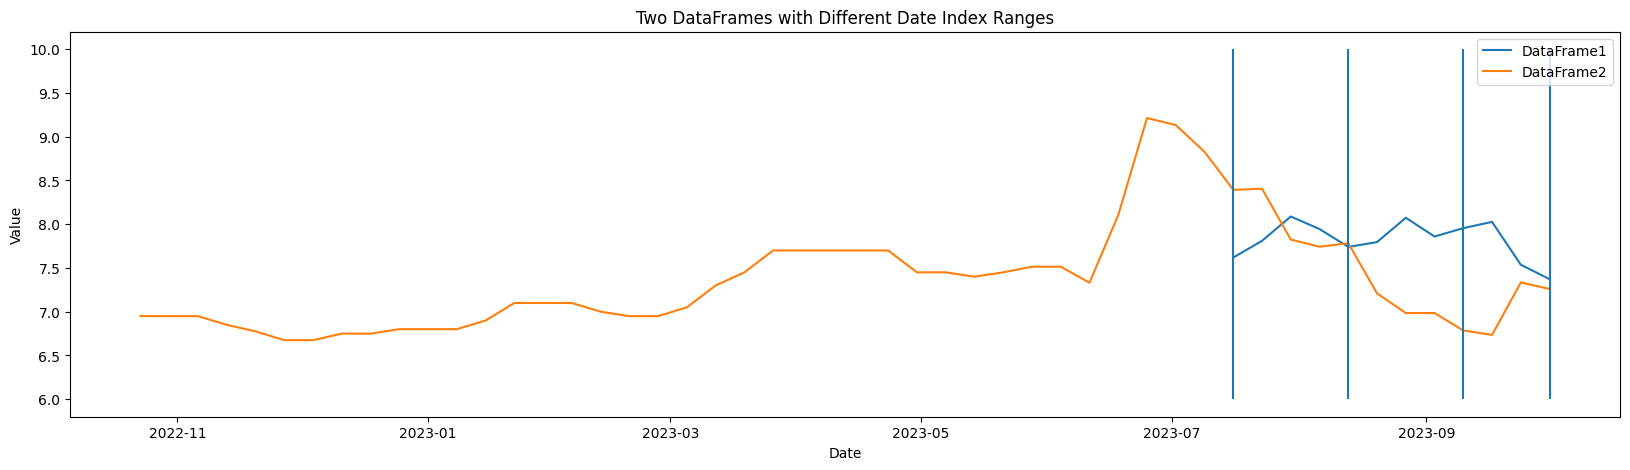

In [35]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='DataFrame1')

# Plot the second DataFrame
plt.plot(df2.index, df2, label='DataFrame2')
ax.vlines(x=["2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Two DataFrames with Different Date Index Ranges')
plt.legend()

# Show the plot
plt.show()